# **MACHINE LEARNING PROJECT ON THE BUIILDNG GENOME PROJECT**

# **SECTION A: Clustering of the Daily Energy Consumption load profiles for the Building Data genome Project**

Here, we use the clustering algorithm to be able to group buildings with similar energy consumption patterns and immportantly, identify days or groups which have similar total energy consumption patterns.
Through clustering, we provide important information to develop solutions on specific energy saving strategies. We will be able to detect anomalies such as unsual spikes or drop in energy use, that could potetilly indicate issues. Additionallly, clustering will improve demand forecasting that we are later going to do through regression anlysis.
Clustering can adapt to changes in energy patterns over time, ensuring continuous optimizations as building usage or occupancy patterns evolve.

**Objective of Using Clustering Algorithm:**

We aim to use clustering to enhance energy management, leading to greater efficiency, cost savings and more informed decision making.

## **Loading packages:**
Let's use the electrical meter data to create clusters of typical load profiles for analysis. First we can load our conventional packages

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import joblib
import textwrap


Loading all the packages needed for the clustering and regression analysis:

In [2]:
import sklearn
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor

from scipy.cluster.vq import kmeans, vq, whiten
from scipy.spatial.distance import cdist
import numpy as np
from datetime import datetime


In [3]:
## Directory with the csv files:
directory = r"D:\AEC Project\EDX_DS+ML_BuildingGenome\3 - Construction\meter_data"

In [4]:
# List to store DataFrames
dataframes = []

# Iterate over all files in the directory
for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        filepath = os.path.join(directory, filename)
        df = pd.read_csv(filepath)
        dataframes.append((filename, df))
        print(filename)

# Print the list of loaded CSV files
print(f'\nTotal CSV files loaded: {len(dataframes)}')
# for filename in dataframes:
    

Office_Abbey.csv
Office_Abigail.csv
Office_Al.csv
Office_Alannah.csv
Office_Aliyah.csv
Office_Allyson.csv
Office_Alyson.csv
Office_Amelia.csv
Office_Amelie.csv
Office_Anastasia.csv
Office_Andrea.csv
Office_Angelica.csv
Office_Angelina.csv
Office_Angelo.csv
Office_Annika.csv
Office_Ashanti.csv
Office_Asher.csv
Office_Aubrey.csv
Office_Autumn.csv
Office_Ava.csv
Office_Ayden.csv
Office_Ayesha.csv
Office_Benjamin.csv
Office_Benthe.csv
Office_Bianca.csv
Office_Bobbi.csv
Office_Brian.csv
Office_Bryon.csv
Office_Caleb.csv
Office_Cameron.csv
Office_Carissa.csv
Office_Carolina.csv
Office_Catherine.csv
Office_Cecelia.csv
Office_Charles.csv
Office_Clarissa.csv
Office_Clifton.csv
Office_Clinton.csv
Office_Cody.csv
Office_Colby.csv
Office_Conrad.csv
Office_Cora.csv
Office_Corbin.csv
Office_Cristina.csv
Office_Curt.csv
Office_Dawn.csv
Office_Dorian.csv
Office_Eddie.csv
Office_Eileen.csv
Office_Elena.csv
Office_Elizabeth.csv
Office_Ellie.csv
Office_Elliot.csv
Office_Ellis.csv
Office_Emer.csv
Office_E

## **Clustering of the Daily Load Profiles**

Analyzing the daily load profiles from an electrical meter.
First, we explore the data to have a clearer picture of the patterns we will be working on:



## **1. Exploring Data to Observe Patterns:**


## **Loading meter data from a single building**

In [5]:
# Specify the filename you want to read
office_Amelie = 'Office_Amelie.csv'

# Construct the full file path
filepath = os.path.join(directory, office_Amelie)

# Check if the file exists in the directory
if os.path.exists(filepath):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(filepath, index_col = "timestamp", parse_dates=True)
    print(f'{office_Amelie} loaded successfully')
    print(df.head())
else:
    print(f'{office_Amelie} not found in the directory')

Office_Amelie.csv loaded successfully
                     Office_Amelie
timestamp                         
2015-01-01 00:00:00          11.81
2015-01-01 01:00:00          11.29
2015-01-01 02:00:00          12.02
2015-01-01 03:00:00          11.45
2015-01-01 04:00:00          11.85


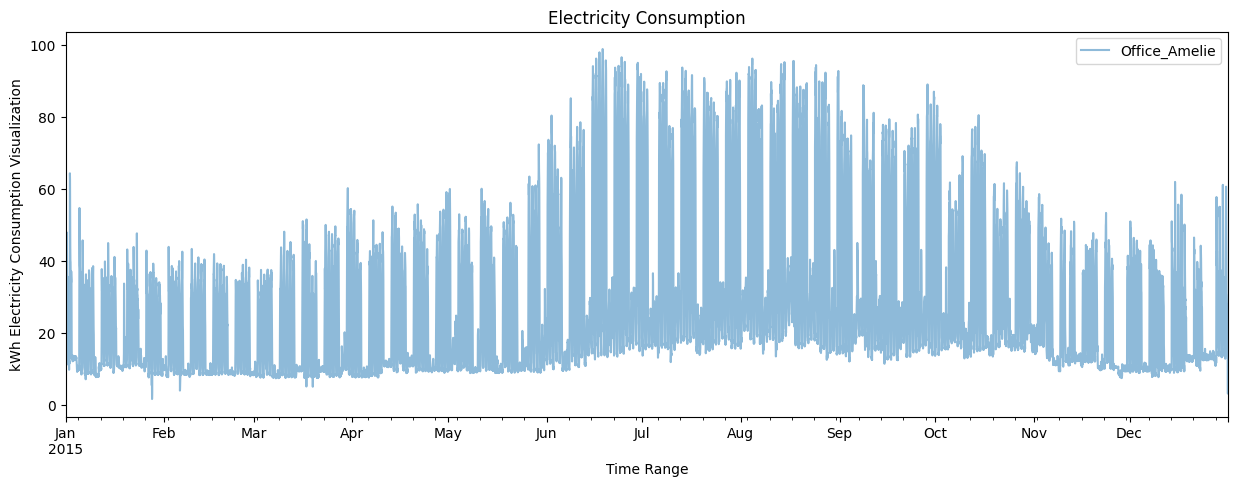

In [6]:
df.plot(alpha=0.5, figsize=(15, 5))
plt.title("Electricity Consumption")
plt.xlabel("Time Range")
plt.ylabel("kWh Electricity Consumption Visualization");

Zooming in on smaller time range to see more detailed patterns:

C:\Users\DENNIS\AppData\Local\Temp\ipykernel_12392\336101817.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df.truncate(before='01-02-2015', after='14-02-2015').plot(figsize=(15,5))


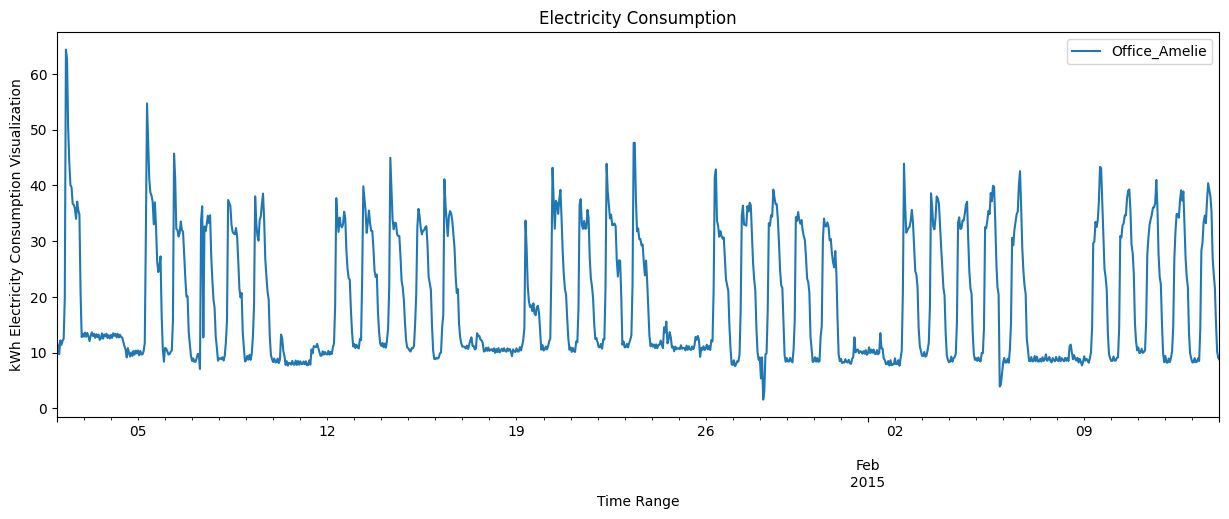

In [7]:
df.truncate(before='01-02-2015', after='14-02-2015').plot(figsize=(15,5))
plt.title("Electricity Consumption")
plt.xlabel("Time Range")
plt.ylabel("kWh Electricity Consumption Visualization");

## **Conventional Daily Profile Analysis - Weekday vs. Weekend**

As observed, there is some standard weekday vs. weekend behaviour and a few basic types of daily patterns.

Conventionally, we look at all the daily profiles.We pivot to get a DataFrame that can be plotted the way we need for analysis.

In [8]:
df['Date'] = df.index.map(lambda t: t.date())
df['Time'] = df.index.map(lambda t: t.time())
df.head()

,Office_Amelie,Date,Time
timestamp,,,
2015-01-01 00:00:00,11.81,2015-01-01,00:00:00
2015-01-01 01:00:00,11.29,2015-01-01,01:00:00
2015-01-01 02:00:00,12.02,2015-01-01,02:00:00
2015-01-01 03:00:00,11.45,2015-01-01,03:00:00
2015-01-01 04:00:00,11.85,2015-01-01,04:00:00


In [9]:
df_pivot = pd.pivot_table(df, values='Office_Amelie', index='Date', columns='Time')
df_pivot.head()

Time,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,...,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,11.81,11.29,12.02,11.45,11.85,11.02,12.11,11.39,47.91,47.53,...,31.88,31.03,31.90,33.55,33.60,35.24,35.52,19.07,11.71,11.06
2015-01-02,11.87,11.19,9.71,12.18,11.38,12.12,12.47,19.86,64.34,62.68,...,36.68,36.51,35.82,33.99,37.08,35.50,34.77,20.80,12.78,13.39
2015-01-03,12.86,13.59,12.86,13.53,12.90,12.06,13.02,13.64,12.96,13.38,...,12.29,12.53,13.46,12.49,13.26,12.92,13.40,12.61,13.12,12.54
2015-01-04,13.17,12.64,13.47,13.01,13.37,12.73,13.37,12.72,13.20,12.78,...,9.14,10.82,9.92,9.29,10.01,9.41,10.31,9.63,10.37,9.85
2015-01-05,10.38,9.51,10.30,9.67,9.70,10.27,11.73,31.82,54.69,47.74,...,33.00,36.94,32.56,26.46,24.44,25.47,27.26,16.56,10.75,8.38


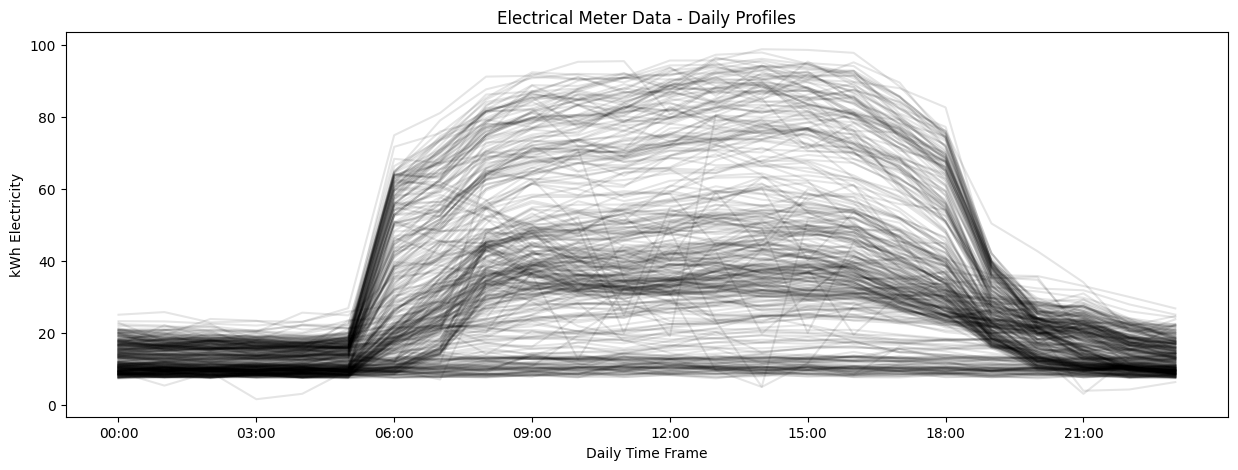

In [10]:
df_pivot.T.plot(legend=False, figsize=(15,5), color='k', alpha=0.1, xticks=np.arange(0, 86400, 10800))
plt.title("Electrical Meter Data - Daily Profiles")
plt.xlabel("Daily Time Frame")
plt.ylabel("kWh Electricity");

Observed above is a few pretty common patterns and a few outlier patterns where we have some consumption in the early morning and late night hours.

By conventional wisdom, we obviously divide up the dataset by weekdays vs weekends.

Checking the weekdays data first:

In [11]:
df['Weekday'] = df.index.map(lambda t: t.date().weekday())
df.head()

,Office_Amelie,Date,Time,Weekday
timestamp,,,,
2015-01-01 00:00:00,11.81,2015-01-01,00:00:00,3
2015-01-01 01:00:00,11.29,2015-01-01,01:00:00,3
2015-01-01 02:00:00,12.02,2015-01-01,02:00:00,3
2015-01-01 03:00:00,11.45,2015-01-01,03:00:00,3
2015-01-01 04:00:00,11.85,2015-01-01,04:00:00,3


In [12]:
df_pivot_weekday = pd.pivot_table(df[(df.Weekday < 5)], values='Office_Amelie', index='Date', columns='Time')
df_pivot_weekday.head()

Time,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,...,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,11.81,11.29,12.02,11.45,11.85,11.02,12.11,11.39,47.910,47.5300,...,31.88,31.03,31.90,33.55,33.60,35.24,35.52,19.07,11.71,11.06
2015-01-02,11.87,11.19,9.71,12.18,11.38,12.12,12.47,19.86,64.340,62.6800,...,36.68,36.51,35.82,33.99,37.08,35.50,34.77,20.80,12.78,13.39
2015-01-05,10.38,9.51,10.30,9.67,9.70,10.27,11.73,31.82,54.690,47.7400,...,33.00,36.94,32.56,26.46,24.44,25.47,27.26,16.56,10.75,8.38
2015-01-06,10.85,10.71,10.26,9.66,9.75,10.13,10.37,15.65,45.680,41.3200,...,33.50,31.99,31.66,27.48,23.37,20.08,20.08,13.72,11.49,9.39
2015-01-07,8.50,8.96,8.36,8.36,8.95,9.76,9.75,7.06,33.785,36.2475,...,34.54,33.25,34.63,27.26,23.02,19.52,18.00,12.85,10.86,8.55


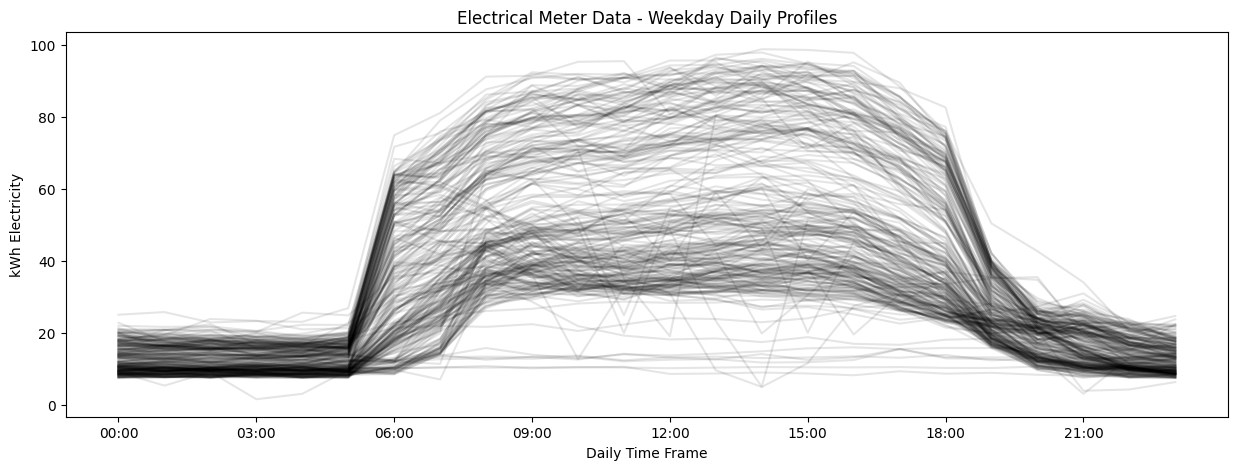

In [13]:
df_pivot_weekday.T.plot(legend=False, figsize=(15,5), color='k', alpha=0.1, xticks=np.arange(0, 86400, 10800))
plt.title("Electrical Meter Data - Weekday Daily Profiles")
plt.xlabel("Daily Time Frame")
plt.ylabel("kWh Electricity");

Weekday data patterns reveals anomolous-looking daily profiles that are not characterized only by the day of the week -- this can be due to holidays, weird schedules, or actually deviant behaviour.



### **Manual indentification of clusters**

There also seems to be varying levels of consumption throughout the course of a year. This is likely because of weather effects or schedule changes.
These could be considered "clusters" of behavior.

Viewing data patterns for the weekend:

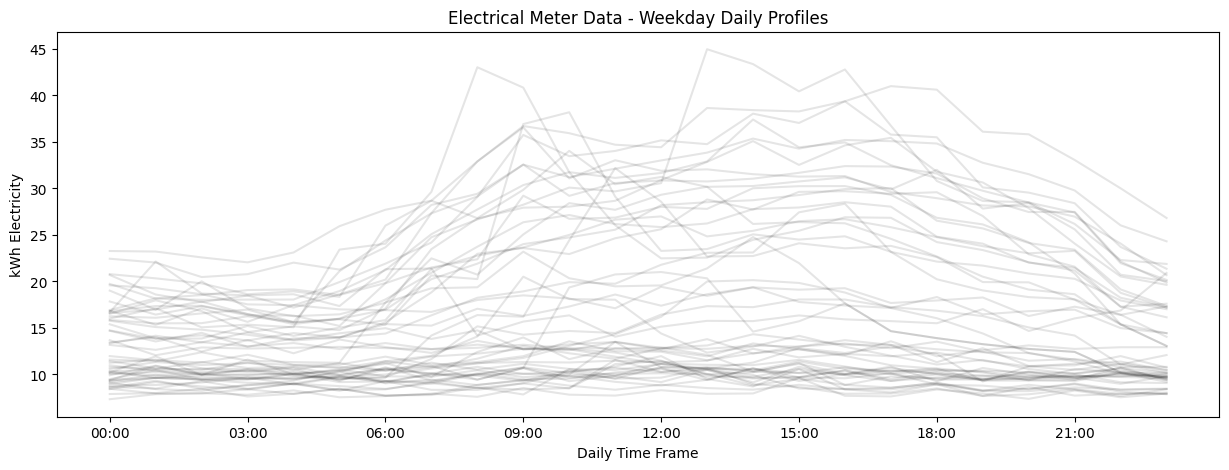

In [14]:
df_pivot_weekend = pd.pivot_table(df[(df.Weekday > 5)], values='Office_Amelie', index='Date', columns='Time')
df_pivot_weekend.T.plot(legend=False, figsize=(15,5), color='k', alpha=0.1, xticks=np.arange(0, 86400, 10800))
plt.title("Electrical Meter Data - Weekday Daily Profiles")
plt.xlabel("Daily Time Frame")
plt.ylabel("kWh Electricity");

Weekends have a lower standard level of consumption with only bits of consumption during daytime hours


##**2. Analyzing:**
## **k-Means Clustering of Daily Load Profiles**

Reload the dataframe to start over so as to use the K-means clustering algorithm

In [15]:
# Check if the file exists in the directory
if os.path.exists(filepath):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(filepath, index_col = "timestamp", parse_dates=True)
    print(f'{office_Amelie} loaded successfully')
    print(df.head())
else:
    print(f'{office_Amelie} not found in the directory')

Office_Amelie.csv loaded successfully
                     Office_Amelie
timestamp                         
2015-01-01 00:00:00          11.81
2015-01-01 01:00:00          11.29
2015-01-01 02:00:00          12.02
2015-01-01 03:00:00          11.45
2015-01-01 04:00:00          11.85


In [16]:
# Extract time and date components before normalization
df['Time'] = df.index.map(lambda t: t.time())
df['Date'] = df.index.map(lambda t: t.date())

# Select only numerical columns for normalization
numeric_cols = df.select_dtypes(include=['number']).columns
df_norm = (df[numeric_cols] - df[numeric_cols].mean()) / (df[numeric_cols].max() - df[numeric_cols].min())

# Add back the time and date columns to the normalized dataframe
df_norm['Time'] = df['Time']
df_norm['Date'] = df['Date']


In [17]:
dailyblocks = pd.pivot_table(df, values='Office_Amelie', index='Date', columns='Time', aggfunc='mean')
dailyblocks_norm = pd.pivot_table(df_norm, values='Office_Amelie', index='Date', columns='Time', aggfunc='mean')
dailyblocks_norm.head()

Time,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,...,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,-0.173553,-0.178896,-0.171395,-0.177252,-0.173142,-0.181670,-0.170471,-0.177868,0.197360,0.193455,...,0.032658,0.023925,0.032863,0.049816,0.050330,0.067181,0.070057,-0.098960,-0.174581,-0.181259
2015-01-02,-0.172937,-0.179923,-0.195130,-0.169751,-0.177971,-0.170368,-0.166772,-0.090843,0.366171,0.349115,...,0.081976,0.080229,0.073140,0.054337,0.086086,0.069852,0.062351,-0.081185,-0.163587,-0.157319
2015-01-03,-0.162765,-0.155264,-0.162765,-0.155881,-0.162354,-0.170984,-0.161121,-0.154751,-0.161737,-0.157422,...,-0.168621,-0.166155,-0.156600,-0.166566,-0.158655,-0.162148,-0.157216,-0.165333,-0.160093,-0.166053
2015-01-04,-0.159580,-0.165025,-0.156497,-0.161224,-0.157525,-0.164100,-0.157525,-0.164203,-0.159271,-0.163587,...,-0.200986,-0.183725,-0.192972,-0.199445,-0.192047,-0.198212,-0.188965,-0.195952,-0.188348,-0.193691
2015-01-05,-0.188246,-0.197185,-0.189068,-0.195541,-0.195232,-0.189376,-0.174375,0.032041,0.267021,0.195613,...,0.044165,0.084647,0.039645,-0.023030,-0.043785,-0.033202,-0.014811,-0.124749,-0.184444,-0.208795


### **The Clustering Model**
We indicate that we need the model to extract 4 clusters from the data

In [18]:
# Converting the normalized daily block data into a NumPy matrix after dropping missing values,
# which is a suitable format for the k-means algorithm.
dailyblocksmatrix_norm = np.matrix(dailyblocks_norm.dropna())

# Performing k-means clustering on the data matrix. This aims to group the daily load profiles into 4 clusters (k=4) and iterates up to 10000 times
# to find optimal cluster centers. The _ discards the second output of the kmeans function, which represents distortion.
centers, _ = kmeans(dailyblocksmatrix_norm, 4, iter=10000)


##**Pickling for Deployment**

In [19]:
import pickle 

#### Pickle file saved to local pc

In [20]:
# Specify the file path for your local PC
local_file_path = r"D:\Genome Project\BuildingGenome\knmeans_centers.pkl"  # local pc file path

# Pickle the centers to your local file
with open(local_file_path, 'wb') as f:
    pickle.dump(centers, f)

#### Pickle file saved to google drive:

In [21]:
# Drive is already imported
# Saving the pickeld model to the Google Drive folder
#with open("/content/gdrive/My Drive/AEC 4/kmeans_centers.pkl", 'wb') as f:
#    pickle.dump(centers, f)

In [22]:
# Accessing the file
#with open('E:\Python Projects 1\Building Genome Project\EDX Data Science for Construction, Architecture and Engineering-20240718T110603Z-001\Building_Genome\BuildingGenomeProject\kmeans_centers.pkl', 'rb') as f:
#       loaded_centers = pickle.load(f)

In [23]:
# Assigning each daily load profile to its closest cluster center using vector quantization (vq). It returns a list of
# cluster assignments (cluster) and the distances between each data point and its assigned center (discarded using _).
cluster, _ = vq(dailyblocksmatrix_norm, centers)
clusterdf = pd.DataFrame(cluster, columns=['ClusterNo']) # assigns the clusters created to a dataframe
dailyclusters = pd.concat([dailyblocks.dropna().reset_index(), clusterdf], axis=1) # concatenates the clusterdf and dailyblocks dataframes
dailyclusters.head()

,Date,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,...,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00,ClusterNo
0,2015-01-01,11.81,11.29,12.02,11.45,11.85,11.02,12.11,11.39,47.91,...,31.03,31.90,33.55,33.60,35.24,35.52,19.07,11.71,11.06,3
1,2015-01-02,11.87,11.19,9.71,12.18,11.38,12.12,12.47,19.86,64.34,...,36.51,35.82,33.99,37.08,35.50,34.77,20.80,12.78,13.39,2
2,2015-01-03,12.86,13.59,12.86,13.53,12.90,12.06,13.02,13.64,12.96,...,12.53,13.46,12.49,13.26,12.92,13.40,12.61,13.12,12.54,0
3,2015-01-04,13.17,12.64,13.47,13.01,13.37,12.73,13.37,12.72,13.20,...,10.82,9.92,9.29,10.01,9.41,10.31,9.63,10.37,9.85,0
4,2015-01-05,10.38,9.51,10.30,9.67,9.70,10.27,11.73,31.82,54.69,...,36.94,32.56,26.46,24.44,25.47,27.26,16.56,10.75,8.38,3


In [24]:
np.size(dailyblocksmatrix_norm, axis=0)

365

After concatenating the clustersdf and dailyblocks dataframes as above, we observe that the last column of the new dataframe, dailyclusters,  is the cluster number assigned by the k-means process.
Next, the clustering numbers are reordered numbers so that the greatest consuming clusters have the highest numbers:

In [25]:
# Calculating the total average consumption for each cluster.
x = dailyclusters.groupby('ClusterNo').mean(numeric_only=True).sum(axis=1).sort_values()
# Create a DataFrame from the sorted result and assign new cluster numbers.
print(f"""For the total average consumption of each cluster:
{x}""")

x_new = pd.DataFrame(x.reset_index()) # Creates a DataFrame from the sorted result
print(f"""Dataframe of the sorted result:
{x_new}""")
x_new['ClusterNo2'] = x_new.index # Creates a new column 'ClusterNo2' and assigns new cluster numbers (0, 1, 2, ...) based on the sorted order.
x_new = x_new.set_index('ClusterNo') # Sets 'ClusterNo' as the index.
x_new = x_new.drop([0], axis=1) # Drops the unnecessary column with sum of averages of the clusters
print(f"""Dataframe of with the dropped unnecessary column:
{x_new}""")
# Merge the new cluster numbers into the original DataFrame.
dailyclusters = dailyclusters.merge(x_new, how='outer', left_on='ClusterNo', right_index=True)
# dailyclusters.merge(...): Merges the original dailyclusters DataFrame with the DataFrame x containing the new cluster numbers.
# how='outer': Performs a full outer join, including all rows from both DataFrames.
# left_on='ClusterNo': Specifies the column to join on from the left DataFrame (dailyclusters).
# right_index=True: Specifies that the index of the right DataFrame (x) should be used as the join key.
print(f"""The merged Dataframe:
{dailyclusters.head()}""")
dailyclusters = dailyclusters.drop(['ClusterNo'],axis=1) # drops the 'ClusterNo' column because it is now unnecessary since we rordered the clusters to 'ClusterNo2' order
dailyclusters = dailyclusters.set_index(['ClusterNo2','Date']).T.sort_index() # sets the dataframe with multilevel indexing, 'ClusterNo2' as level 0
print(f"""Dataframe with multilevel indexing, 'ClusterNo2' as level 0:
{dailyclusters.head()}""")

For the total average consumption of each cluster:
ClusterNo
0     276.038233
3     550.956741
2     714.918966
1    1173.813846
dtype: float64
Dataframe of the sorted result:
   ClusterNo            0
0          0   276.038233
1          3   550.956741
2          2   714.918966
3          1  1173.813846
Dataframe of with the dropped unnecessary column:
           ClusterNo2
ClusterNo            
0                   0
3                   1
2                   2
1                   3
The merged Dataframe:
          Date  00:00:00  01:00:00  02:00:00  03:00:00  04:00:00  05:00:00  \
2   2015-01-03     12.86     13.59     12.86     13.53     12.90     12.06   
3   2015-01-04     13.17     12.64     13.47     13.01     13.37     12.73   
9   2015-01-10      8.30      8.95      8.24      8.29      8.93      8.12   
10  2015-01-11      8.45      7.95      7.95      8.41      7.90      8.44   
16  2015-01-17     11.05     11.08     11.04     10.74     11.24     10.66   

    06:00:00  07:00:0

Above, is a dataframe with each of the clusters hiearchically divided.
To visualize the clusters, we first look at all the profiles at once divided according to cluster:

##**3. Visualization**

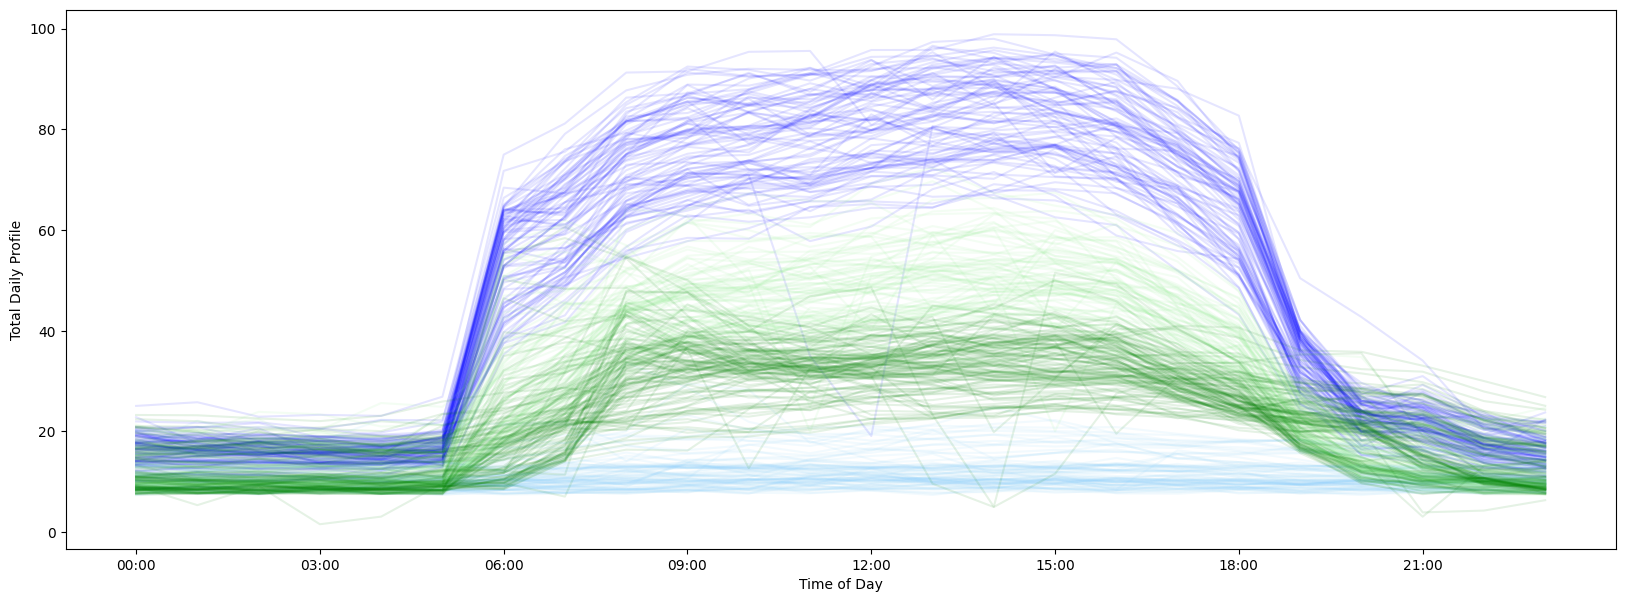

In [26]:
clusterlist = list(dailyclusters.columns.get_level_values(0).unique()) # Extracts a list of unique cluster numbers from the dailyclusters DataFrame.
# The code above retrieves all the values from the first level (level 0) of the column index. In this case, it gets all the cluster numbers associated with each column.

matplotlib.rcParams['figure.figsize'] = 20, 7

styles2 = ['LightSkyBlue', 'b','LightGreen', 'g','LightCoral','r','SandyBrown','Orange','Plum','Purple','Gold','b']
fig, ax = plt.subplots() # Creates a figure and an axes object for plotting
for col, style in zip(clusterlist, styles2): # Iterates over each cluster number and its corresponding style.
    dailyclusters[col].plot(ax=ax, legend=False, style=style, alpha=0.1, xticks=np.arange(0, 86400, 10800)) # Plots the daily profiles for the current cluster number with the specified style.

ax.set_ylabel('Total Daily Profile')
ax.set_xlabel('Time of Day');

In [27]:
clusterlist

[0, 3, 2, 1]

### **Aggregate visualizations of the clusters**

Aggregating and visualizing the clusters as they exist across the time range:



In [28]:
def timestampcombine(date,time):
    pydatetime = datetime.combine(date, time)
    return pydatetime

In [29]:
# Unstacking and Resetting Index:
## df = df.unstack().reset_index(): This unstacks the DataFrame, moving the inner level of the hierarchical index
## to become columns. Then, it resets the index to a default integer index, making the unstacked levels regular columns
### df['timestampstring'] = pd.to_datetime(df.Date.astype("str") + " " + df.level_2.astype("str")): This creates a
### new column called 'timestampstring' by concatenating the 'Date' and 'level_2' columns (which contain date and time
### information, respectively) as strings and converting the result to datetime objects using pd.to_datetime.
def ClusterUnstacker(df):
    df = df.unstack().reset_index() # code 1
    df['timestampstring'] = pd.to_datetime(df.Date.astype("str") + " " + df.level_2.astype("str")) # code 2
    #pd.to_datetime(df.Date  df.level_2) #map(timestampcombine, )
    df = df.dropna()
    return df

In [30]:
dailyclusters.unstack().reset_index().head() # code example for unstacking

,ClusterNo2,Date,level_2,0
0,0,2015-01-03,00:00:00,12.86
1,0,2015-01-03,01:00:00,13.59
2,0,2015-01-03,02:00:00,12.86
3,0,2015-01-03,03:00:00,13.53
4,0,2015-01-03,04:00:00,12.90


In [31]:
dfclusterunstacked = ClusterUnstacker(dailyclusters)
dfclusterunstackedpivoted = pd.pivot_table(dfclusterunstacked, values=0, index='timestampstring', columns='ClusterNo2')
dfclusterunstackedpivoted

ClusterNo2,0,1,2,3
timestampstring,,,,
2015-01-01 00:00:00,NaN,11.81,NaN,NaN
2015-01-01 01:00:00,NaN,11.29,NaN,NaN
2015-01-01 02:00:00,NaN,12.02,NaN,NaN
2015-01-01 03:00:00,NaN,11.45,NaN,NaN
2015-01-01 04:00:00,NaN,11.85,NaN,NaN
...,...,...,...,...
2015-12-31 19:00:00,NaN,16.50,NaN,NaN
2015-12-31 20:00:00,NaN,14.03,NaN,NaN
2015-12-31 21:00:00,NaN,3.07,NaN,NaN


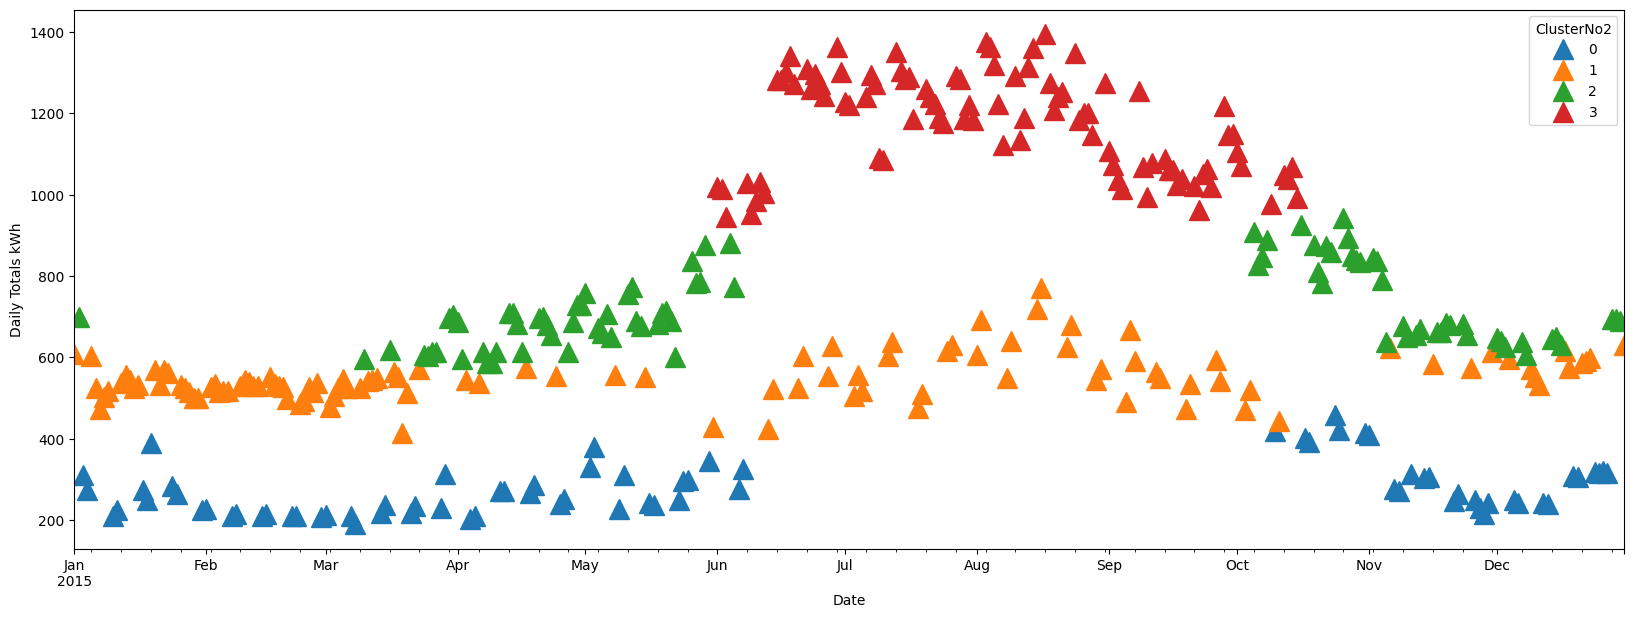

In [32]:
clusteravgplot = dfclusterunstackedpivoted.resample('D').sum().replace(0, np.nan).plot(style="^",markersize=15)
clusteravgplot.set_ylabel('Daily Totals kWh')
clusteravgplot.set_xlabel('Date');

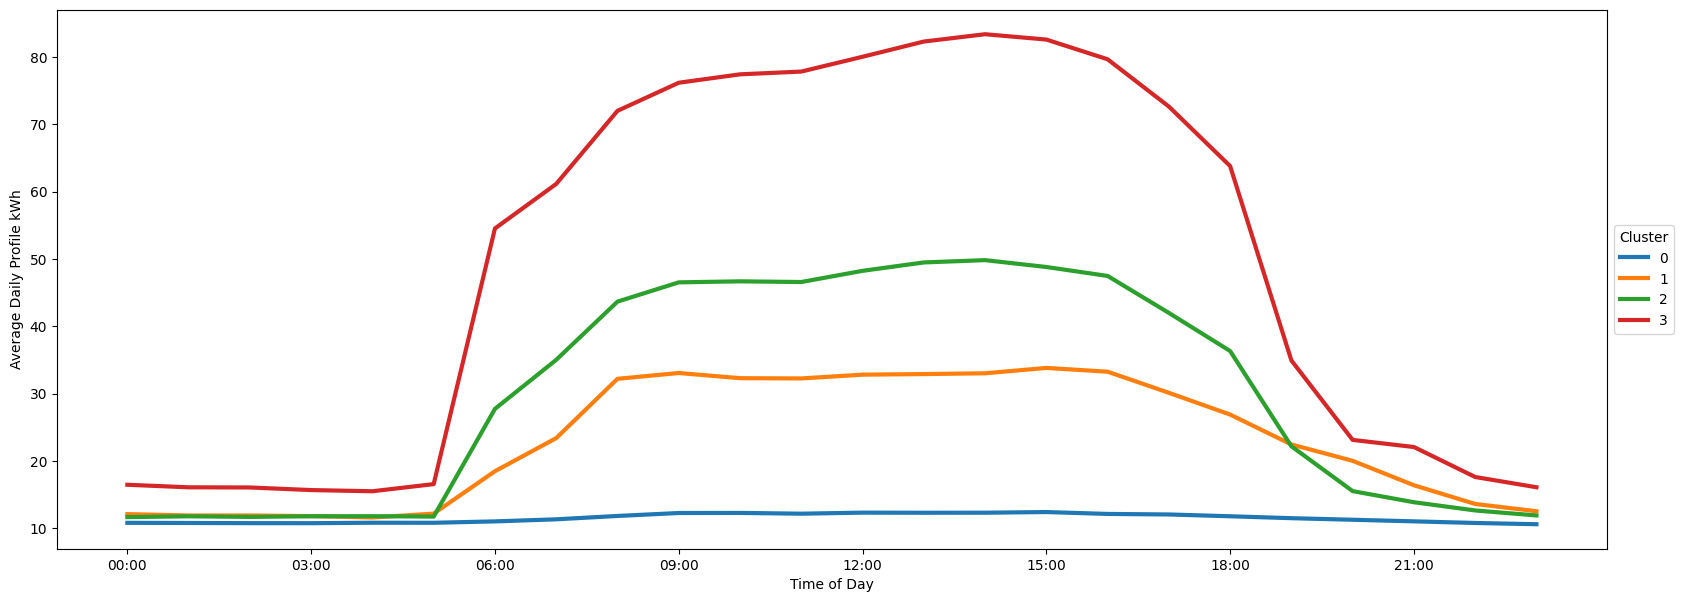

In [33]:
dfclusterunstackedpivoted['Time'] = dfclusterunstackedpivoted.index.map(lambda t: t.time())
dailyprofile = dfclusterunstackedpivoted.groupby('Time').mean().plot(figsize=(20,7),linewidth=3, xticks=np.arange(0, 86400, 10800))
dailyprofile.set_ylabel('Average Daily Profile kWh')
dailyprofile.set_xlabel('Time of Day')
dailyprofile.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Cluster')

In [34]:
dfclusterunstackedpivoted['Time'] = dfclusterunstackedpivoted.index.map(lambda t: t.time())
dfclusterunstackedpivoted

ClusterNo2,0,1,2,3,Time
timestampstring,,,,,
2015-01-01 00:00:00,NaN,11.81,NaN,NaN,00:00:00
2015-01-01 01:00:00,NaN,11.29,NaN,NaN,01:00:00
2015-01-01 02:00:00,NaN,12.02,NaN,NaN,02:00:00
2015-01-01 03:00:00,NaN,11.45,NaN,NaN,03:00:00
2015-01-01 04:00:00,NaN,11.85,NaN,NaN,04:00:00
...,...,...,...,...,...
2015-12-31 19:00:00,NaN,16.50,NaN,NaN,19:00:00
2015-12-31 20:00:00,NaN,14.03,NaN,NaN,20:00:00
2015-12-31 21:00:00,NaN,3.07,NaN,NaN,21:00:00


In [35]:
def DayvsClusterMaker(df):
    df.index = df.timestampstring
    df['Weekday'] = df.index.map(lambda t: t.date().weekday())
    df['Date'] = df.index.map(lambda t: t.date())
    df['Time'] = df.index.map(lambda t: t.time())
    # Convert 'Date' column to datetime objects before resampling
    df['Date'] = pd.to_datetime(df['Date'])
    DayVsCluster = df.resample('D').mean(numeric_only=True).reset_index(drop=True)
    DayVsCluster = pd.pivot_table(DayVsCluster, values=0, index='ClusterNo2', columns='Weekday', aggfunc='count')
    DayVsCluster.columns = ['Mon','Tue','Wed','Thur','Fri','Sat','Sun']
    return DayVsCluster.T

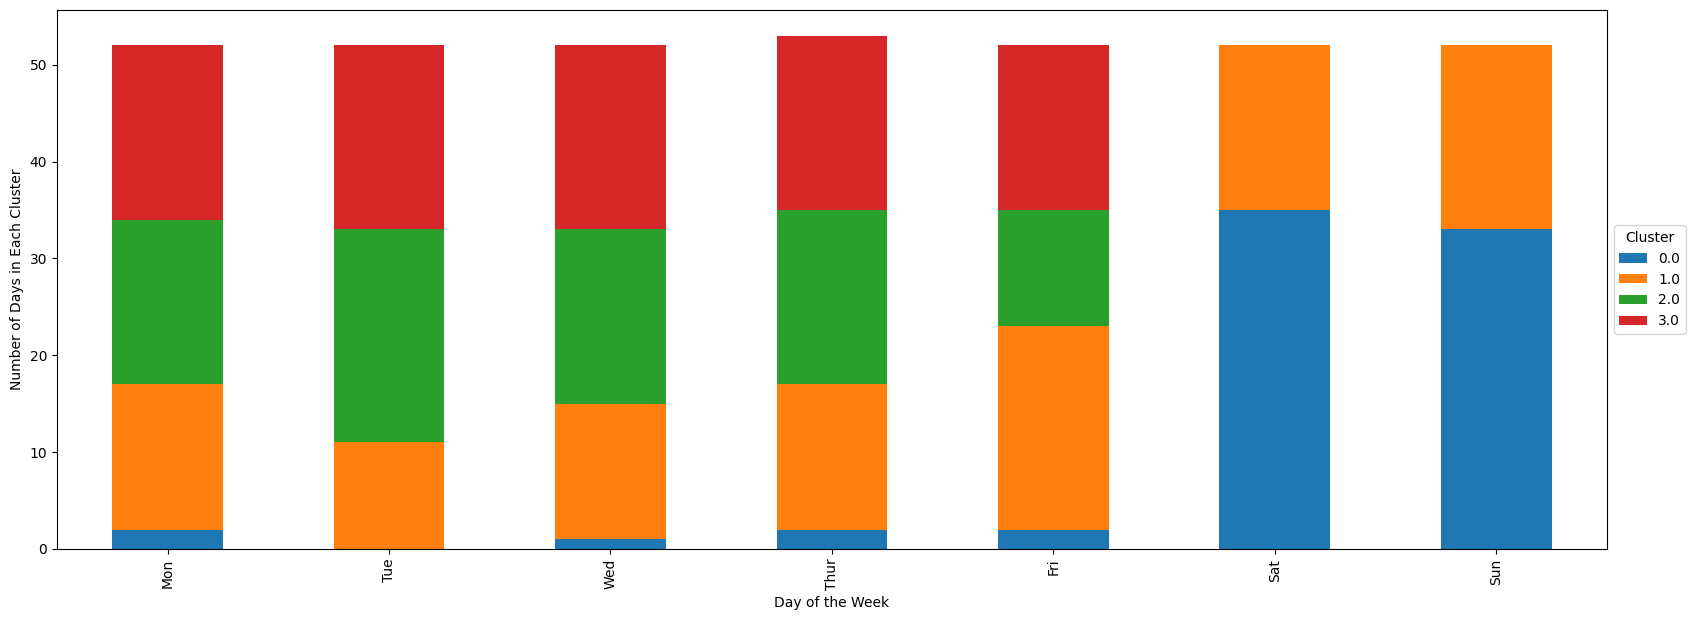

In [36]:
DayVsCluster = DayvsClusterMaker(dfclusterunstacked)
DayVsClusterplot1 = DayVsCluster.plot(figsize=(20,7),kind='bar',stacked=True)
DayVsClusterplot1.set_ylabel('Number of Days in Each Cluster')
DayVsClusterplot1.set_xlabel('Day of the Week')
DayVsClusterplot1.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Cluster')

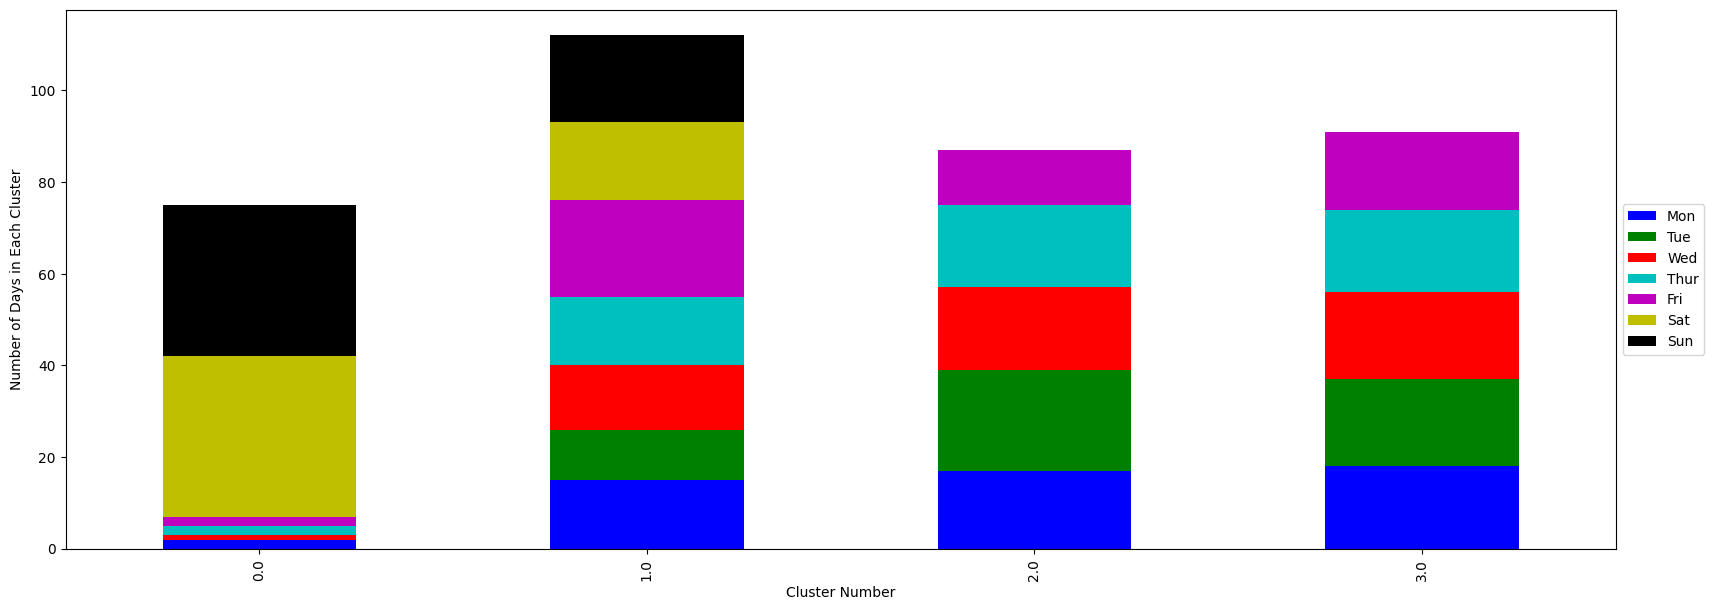

In [37]:
DayVsClusterplot2 = DayVsCluster.T.plot(figsize=(20,7),kind='bar',stacked=True, color=['b','g','r','c','m','y','k']) #, color=colors2
DayVsClusterplot2.set_ylabel('Number of Days in Each Cluster')
DayVsClusterplot2.set_xlabel('Cluster Number')
DayVsClusterplot2.legend(loc='center left', bbox_to_anchor=(1, 0.5))

## **Summary of the Clustering Model**
As earlier observed and predicted the least consumption happens during the weekends. That is why we have cluster 0 and 1 (least energy consumed clusters) observed only on Saturday and Sunday.
High energy consumption depicted by clusters 3 and 2, is observed only during the weekdays.

# **SECTION B: K- Nearest Neighbor Regression Model**
## **Electricity Prediction using Regression for Measurement and Verification**

Prediction is valuable for anomaly detection, load profile-based building control and measurement and verification procedures.

For instance, the graphic below comes from the IPMVP to show how prediction can be used for M & V to calculate how much energy **would have** been consumed if an energy savings intervention had not been implemented.
It is worth noting that the intervention was made possible after applying regression models to predict energy consumption of the building(s).

In this section of the project, we are interested on the impact of weather data,particularly interested the influence of external temperature on energy consumption and how we can predict energy consumption based on historical temperature vs energy consumption patterns



## Prediction for Measurement and Verification

![alt text](https://raw.githubusercontent.com/buds-lab/the-building-data-genome-project/master/docs/edx-graphics/EDX-ML-ScikitLearn-3.png)





## **Loading electricity data and weather data**


In [38]:
# Specify the filename you want to read
UnivClass_Ciara = 'UnivClass_Ciara.csv'

# Construct the full file path
filepath = os.path.join(directory, UnivClass_Ciara)

# Check if the file exists in the directory
if os.path.exists(filepath):
    # Read the CSV file into a DataFrame
    df_prediction_data = pd.read_csv(filepath, index_col = "timestamp", parse_dates=True)
    print(f'{UnivClass_Ciara} loaded successfully')
    print(df_prediction_data.head())
else:
    print(f'{UnivClass_Ciara} not found in the directory')


UnivClass_Ciara.csv loaded successfully
                     UnivClass_Ciara
timestamp                           
2015-01-01 00:00:00       136.824997
2015-01-01 01:00:00       144.025002
2015-01-01 02:00:00       144.875000
2015-01-01 03:00:00       142.375000
2015-01-01 04:00:00       148.199997


<Axes: xlabel='timestamp'>

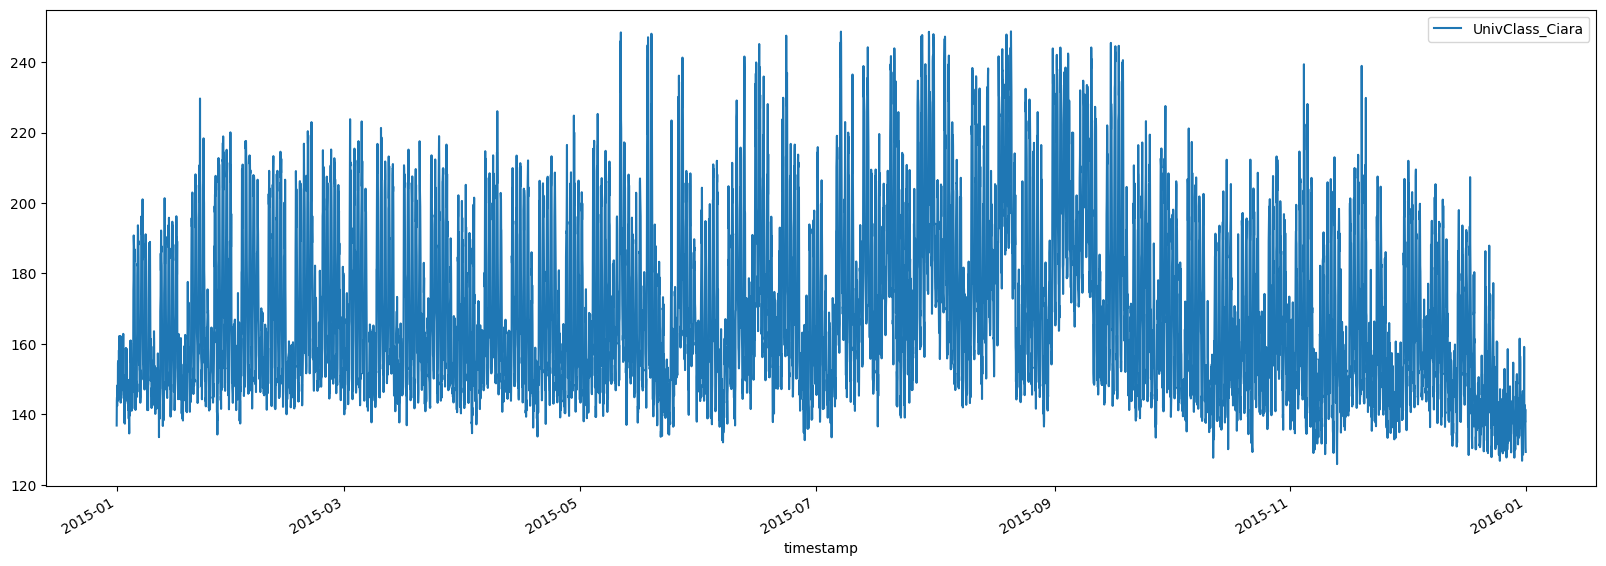

In [39]:
df_prediction_data.plot()

In [40]:
directory2 = r'D:\AEC Project\EDX_DS+ML_BuildingGenome\3 - Construction\weather_data'  # Use raw string to avoid issues with backslashes
# Construct the full file path
weather2_data = 'weather2.csv'
filepath2 = os.path.join(directory2, weather2_data)

# Check if the file exists in the directory
if os.path.exists(filepath2):
    # Read the CSV file into a DataFrame
    weather_data = pd.read_csv(filepath2, index_col = "timestamp", parse_dates=True)
    print(f'{weather2_data} loaded successfully')
    print(weather_data.head())
else:
    print(f'{weather2_data} not found in the directory')


weather2.csv loaded successfully
                    Conditions              DateUTC<br />  Dew PointC Events  \
timestamp                                                                      
2015-01-01 00:56:00   Overcast  2015-01-01 05:56:00<br />       -15.0    NaN   
2015-01-01 01:56:00   Overcast  2015-01-01 06:56:00<br />       -14.4    NaN   
2015-01-01 02:56:00   Overcast  2015-01-01 07:56:00<br />       -14.4    NaN   
2015-01-01 03:56:00   Overcast  2015-01-01 08:56:00<br />       -14.4    NaN   
2015-01-01 04:56:00   Overcast  2015-01-01 09:56:00<br />       -14.4    NaN   

                    Gust SpeedKm/h  Humidity  Precipitationmm  \
timestamp                                                       
2015-01-01 00:56:00              -      54.0              NaN   
2015-01-01 01:56:00              -      55.0              NaN   
2015-01-01 02:56:00              -      55.0              NaN   
2015-01-01 03:56:00              -      55.0              NaN   
2015-01-01 04:56

In [41]:
weather_hourly = weather_data.resample("h").mean(numeric_only=True)
weather_hourly_nooutlier = weather_hourly[weather_hourly > -40]
weather_hourly_nooutlier_nogaps = weather_hourly_nooutlier.fillna(method='ffill')

C:\Users\DENNIS\AppData\Local\Temp\ipykernel_12392\98678871.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weather_hourly_nooutlier_nogaps = weather_hourly_nooutlier.fillna(method='ffill')


On weather data, we are particularly interested with the influence of external temperature on energy consumption and how we can predict energy consumption based on historical temperature vs energy consumption patterns.

In [42]:
# Inspect the available columns in the DataFrame
print(weather_hourly_nooutlier_nogaps.columns)

Index(['Dew PointC', 'Humidity', 'Precipitationmm', 'Sea Level PressurehPa',
       'TemperatureC', 'VisibilityKm', 'WindDirDegrees'],
      dtype='object')


In [43]:
eda_df = weather_hourly_nooutlier_nogaps[['Dew PointC', 'TemperatureC', 'Humidity', 'Dew PointC', 'Sea Level PressurehPa', 'VisibilityKm', 'WindDirDegrees']]


timestamp
2015-01-01 00:00:00   -7.2
2015-01-01 01:00:00   -6.6
2015-01-01 02:00:00   -6.6
2015-01-01 03:00:00   -6.6
2015-01-01 04:00:00   -6.6
Freq: h, Name: TemperatureC, dtype: float64

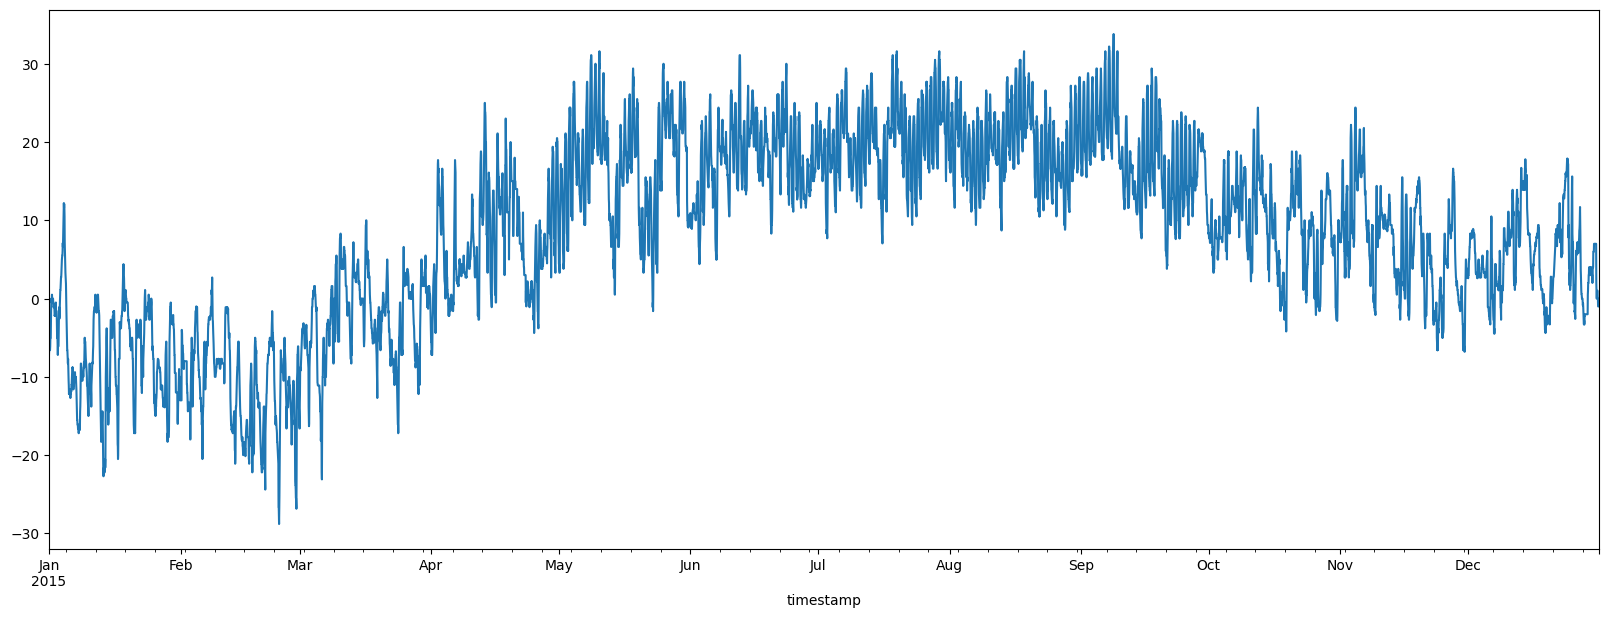

In [44]:
temperature = weather_hourly_nooutlier_nogaps["TemperatureC"]
temperature.plot()
temperature.head()

In [45]:
# Reset the index of 'temperature' to ensure unique index values
eda_df = eda_df.reset_index(drop=True)
# Reset the index of 'df_prediction_data' to ensure unique index values
df_prediction_data_c = df_prediction_data.reset_index(drop=True)
combined_data = pd.concat([df_prediction_data_c, eda_df], axis=1)
combined_data = combined_data.rename(columns={'UnivClass_Ciara': 'energy_load'}) #renaming column
combined_data = pd.DataFrame(combined_data)
combined_data.head()

,energy_load,Dew PointC,TemperatureC,Humidity,Dew PointC,Sea Level PressurehPa,VisibilityKm,WindDirDegrees
0,136.824997,-15.0,-7.2,54.0,-15.0,1017.4,16.1,230.0
1,144.025002,-14.4,-6.6,55.0,-14.4,1017.2,16.1,240.0
2,144.875000,-14.4,-6.6,55.0,-14.4,1016.9,16.1,220.0
3,142.375000,-14.4,-6.6,55.0,-14.4,1017.2,16.1,220.0
4,148.199997,-14.4,-6.6,55.0,-14.4,1017.2,16.1,210.0


**Checking correlation between the features to determine the most important features for our model and also determine which model is most applicable**

In [46]:
combined_data.shape

(8760, 8)

In [47]:
combined_data.corr()

,energy_load,Dew PointC,TemperatureC,Humidity,Dew PointC,Sea Level PressurehPa,VisibilityKm,WindDirDegrees
energy_load,1.000000,0.250472,0.362236,-0.319164,0.250472,-0.052321,0.043493,0.152332
Dew PointC,0.250472,1.000000,0.932439,0.209866,1.000000,-0.194680,0.051574,-0.162559
TemperatureC,0.362236,0.932439,1.000000,-0.150487,0.932439,-0.167112,0.176230,-0.087760
Humidity,-0.319164,0.209866,-0.150487,1.000000,0.209866,-0.080247,-0.385193,-0.236242
Dew PointC,0.250472,1.000000,0.932439,0.209866,1.000000,-0.194680,0.051574,-0.162559
Sea Level PressurehPa,-0.052321,-0.194680,-0.167112,-0.080247,-0.194680,1.000000,0.081743,-0.063176
VisibilityKm,0.043493,0.051574,0.176230,-0.385193,0.051574,0.081743,1.000000,-0.063186
WindDirDegrees,0.152332,-0.162559,-0.087760,-0.236242,-0.162559,-0.063176,-0.063186,1.000000


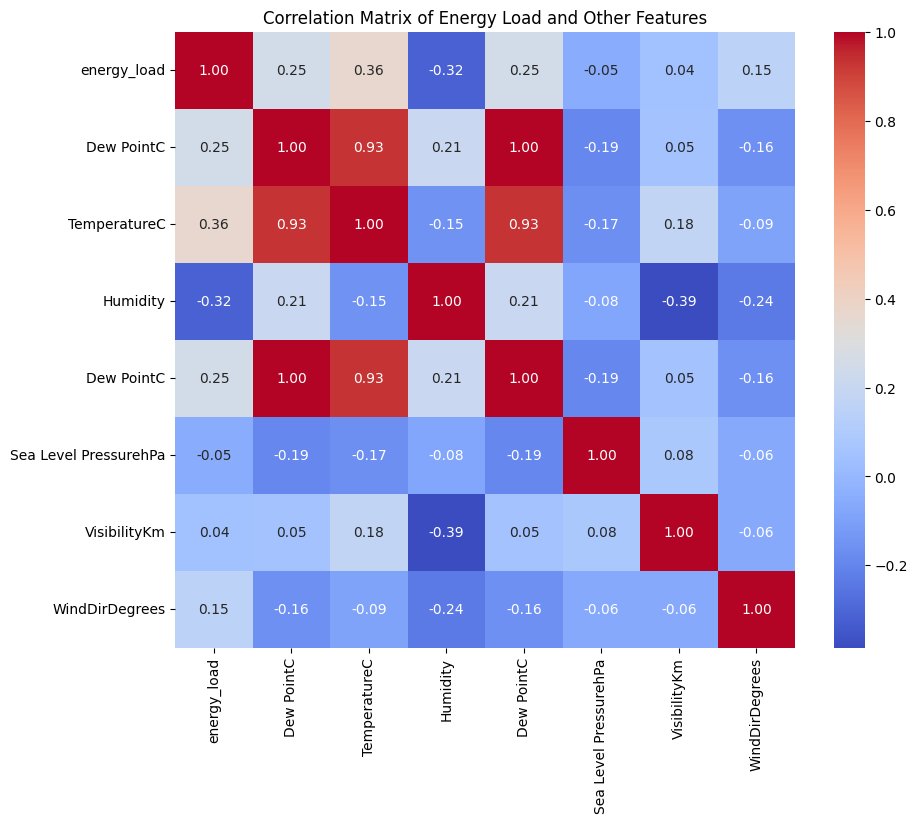

In [48]:
# Calculate the correlation matrix
correlation_matrix = combined_data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Energy Load and Other Features')
plt.show()

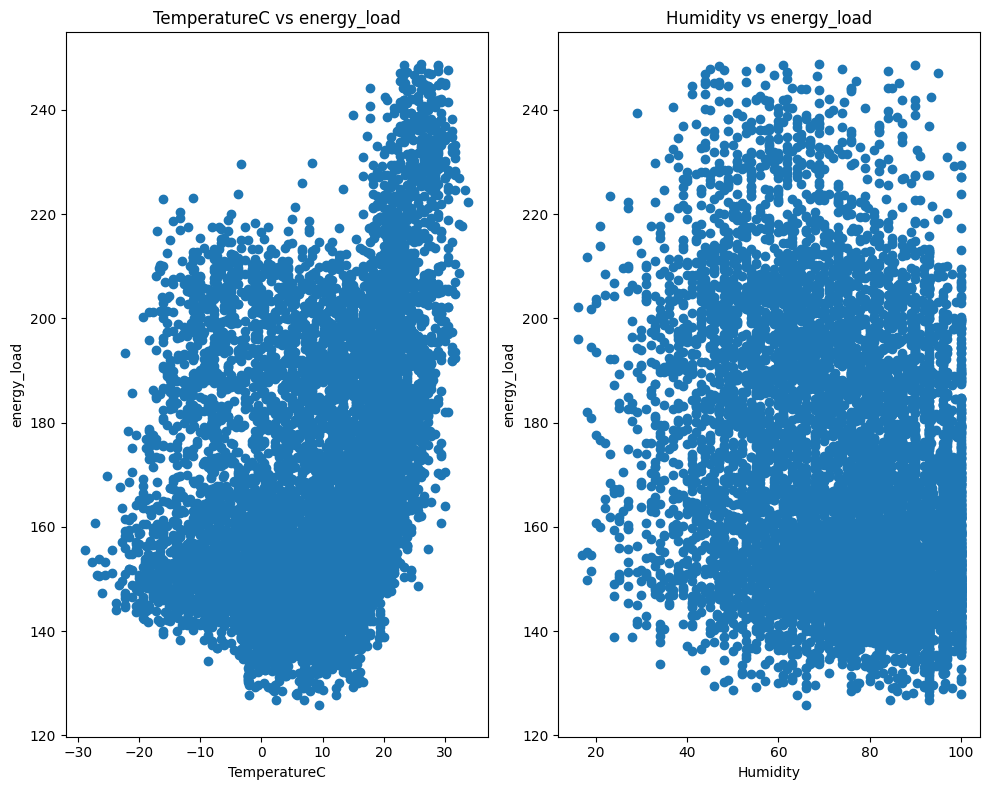

In [49]:

# Create a figure and axes objects
fig, axs = plt.subplots(1, 2, figsize=(10, 8))

# Scatter plot 1: TemperatureC vs energy_load
axs[0].scatter(combined_data.TemperatureC, combined_data.energy_load) # Changed axs[0, 0] to axs[0]
axs[0].set_xlabel("TemperatureC")
axs[0].set_ylabel("energy_load") # Changed axs[0, 0] to axs[0]
axs[0].set_title("TemperatureC vs energy_load") # Changed axs[0, 0] to axs[0]

# Scatter plot 2: Humidity vs energy_load
axs[1].scatter(combined_data.Humidity, combined_data.energy_load) # Changed axs[0, 1] to axs[1]
axs[1].set_xlabel("Humidity") # Changed axs[0, 1] to axs[1]
axs[1].set_ylabel("energy_load") # Changed axs[0, 1] to axs[1]
axs[1].set_title("Humidity vs energy_load") # Changed axs[0, 1] to axs[1]


# Adjust layout and display the plots
plt.tight_layout()
plt.show()

## **Create Train and Test Datasets for the K Nearest Neighbor Regression Supervised Learning Model**

Here, we **train** the model to predict a specific objective. From the above visuals, humin=dity and temperature seem to have stronger correlation with energy data, hence can be used to create a KNN model. Reason for creating a KNN model as opposed to other models are explained further down.
For our case, we will use a few simple time series features as well as outdoor air temperature to predict how much energy a building uses.


### **Data**

To create the KNN model, we will use three months of data i.e. April, May, and June for training the model, July data as cross validation set and August Data as test data set.

In [50]:
training_months = [4,5,6]
cross_months = [7]
test_months = [8]

We can divide the data set by using the `datetime index` of the data frame and a function known as `.isin` to extract the months for the model

In [51]:
trainingdata = df_prediction_data[df_prediction_data.index.month.isin(training_months)]
testdata = df_prediction_data[df_prediction_data.index.month.isin(test_months)]
crossdata = df_prediction_data[df_prediction_data.index.month.isin(cross_months)]

In [52]:
print(f"Our parent dataframe:\n,{df_prediction_data.head()}")
print(f"Traning Set Data:\n,{trainingdata.head()}")
print(f"Test Set Data:\n, {testdata.head()}")
print(f"Cross- validation set data:\n, {crossdata.head()}")

Our parent dataframe:
,                     UnivClass_Ciara
timestamp                           
2015-01-01 00:00:00       136.824997
2015-01-01 01:00:00       144.025002
2015-01-01 02:00:00       144.875000
2015-01-01 03:00:00       142.375000
2015-01-01 04:00:00       148.199997
Traning Set Data:
,                     UnivClass_Ciara
timestamp                           
2015-04-01 00:00:00       145.500000
2015-04-01 01:00:00       141.775002
2015-04-01 02:00:00       158.499996
2015-04-01 03:00:00       142.849998
2015-04-01 04:00:00       145.550003
Test Set Data:
,                      UnivClass_Ciara
timestamp                           
2015-08-01 00:00:00       175.750000
2015-08-01 01:00:00       175.024994
2015-08-01 02:00:00       171.449997
2015-08-01 03:00:00       170.525002
2015-08-01 04:00:00       171.175003
Cross- validation set data:
,                      UnivClass_Ciara
timestamp                           
2015-07-01 00:00:00       151.525002
2015-07-01 01:00:00    

In [53]:
print(f"*Training Data info:\n {trainingdata.info()}")
print(f"Test Data info:\n {testdata.info()}")
print(f"Cross-Validation Data info:\n {crossdata.info()}")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2184 entries, 2015-04-01 00:00:00 to 2015-06-30 23:00:00
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   UnivClass_Ciara  2184 non-null   float64
dtypes: float64(1)
memory usage: 34.1 KB
*Training Data info:
 None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 744 entries, 2015-08-01 00:00:00 to 2015-08-31 23:00:00
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   UnivClass_Ciara  744 non-null    float64
dtypes: float64(1)
memory usage: 11.6 KB
Test Data info:
 None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 744 entries, 2015-07-01 00:00:00 to 2015-07-31 23:00:00
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   UnivClass_Ciara  744 non-null    float64
dtypes: float64(1)
memory usage

Just to explain a bit, below we are extracting the training input data features that will go into the model and the training **label** data which is what we are targeting to predict (Energy consumption).

## **Encoding Categorical Variables**

We encode the temporal variables of *time of day* and *day of week* into categories that the model can use more effectively using the `.get_dummies()` function.

In [54]:
train_features = pd.concat([pd.get_dummies(trainingdata.index.hour),
                                     pd.get_dummies(trainingdata.index.dayofweek),
                                     pd.DataFrame(temperature[temperature.index.month.isin(training_months)].values)], axis=1).dropna()
train_features.info()
train_features.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2184 entries, 0 to 2183
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2184 non-null   bool   
 1   1       2184 non-null   bool   
 2   2       2184 non-null   bool   
 3   3       2184 non-null   bool   
 4   4       2184 non-null   bool   
 5   5       2184 non-null   bool   
 6   6       2184 non-null   bool   
 7   7       2184 non-null   bool   
 8   8       2184 non-null   bool   
 9   9       2184 non-null   bool   
 10  10      2184 non-null   bool   
 11  11      2184 non-null   bool   
 12  12      2184 non-null   bool   
 13  13      2184 non-null   bool   
 14  14      2184 non-null   bool   
 15  15      2184 non-null   bool   
 16  16      2184 non-null   bool   
 17  17      2184 non-null   bool   
 18  18      2184 non-null   bool   
 19  19      2184 non-null   bool   
 20  20      2184 non-null   bool   
 21  21      2184 non-null   bool   
 22  

,0,1,2,3,4,5,6,7,8,9,...,22,23,0,1,2,3,4,5,6,0
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,-5.5
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,-6.1
2,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,-7.2
3,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,-6.6
4,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,-7.2


In [55]:
# Ensuring the temperature data obatined earlier is clean:
view_temp_clean = pd.DataFrame(temperature[temperature.index.month.isin(training_months)].values).dropna()
view_temp_clean.head()

,0
0,-5.5
1,-6.1
2,-7.2
3,-6.6
4,-7.2


## **Training the K-Neighbor Regressor Model**

K- Nearest Neighbor Regressor model is chosen here because the relationship between the dependent (energy data) and independent (temperature data) variables is complex since it is not linear. Moreover, there may be instances where each label (energy) belongs to multiple classes of temperature data.

In [56]:
model = KNeighborsRegressor().fit(np.array(train_features), np.array(trainingdata.values));


In [57]:
model

KNeighborsRegressor()

In [58]:
# Encoding categorical variables for the test data:
test_features = np.array(pd.concat([pd.get_dummies(testdata.index.hour),
                                    pd.get_dummies(testdata.index.dayofweek),
                                    pd.DataFrame(temperature[temperature.index.month.isin(test_months)].values)], axis=1).dropna())

In [59]:
# Encoding categorical variables for the cross validation data:
cross_features = np.array(pd.concat([pd.get_dummies(crossdata.index.hour),
                                    pd.get_dummies(crossdata.index.dayofweek),
                                    pd.DataFrame(temperature[temperature.index.month.isin(cross_months)].values)], axis=1).dropna())



##  **Using the Model to predict for the *Test* period**

Then the model is given the `test_features` from the period which we want to predict. We can then merge those results and see how the model did

In [60]:
predictions = model.predict(cross_features)
predictions

array([[171.32499847],
       [185.13999939],
       [175.48999939],
       [187.01000061],
       [166.32499847],
       [182.01000061],
       [180.73499908],
       [189.09499817],
       [185.93000183],
       [173.19499664],
       [191.68299908],
       [204.07800183],
       [186.56000061],
       [208.15499878],
       [205.78000336],
       [194.70299969],
       [196.13499908],
       [185.33500061],
       [183.02499847],
       [175.44499817],
       [184.47000122],
       [176.29999847],
       [186.99999847],
       [183.46999969],
       [169.32500092],
       [149.22499847],
       [157.9849968 ],
       [166.23499908],
       [148.03999802],
       [150.76249939],
       [150.111     ],
       [167.72000122],
       [177.74500122],
       [187.49000092],
       [199.66999817],
       [200.78500214],
       [204.03500214],
       [198.125     ],
       [206.41499939],
       [197.88499908],
       [200.76499786],
       [189.25999908],
       [184.50500031],
       [173

### **Merging the testdata dataframe with a dataframe we name, predictions that contains the predicted Energy consumption of the test period as recognized from the training data using KNN model.**

In [61]:
# merging the testdata dataframe with a dataframe called predictions created from the array above:
predicted_vs_actual = pd.concat([crossdata, pd.DataFrame(predictions, index=crossdata.index)], axis=1)
predicted_vs_actual.columns = ['Actual', 'Predicted']
predicted_vs_actual.head()

,Actual,Predicted
timestamp,,
2015-07-01 00:00:00,151.525002,171.324998
2015-07-01 01:00:00,152.575005,185.139999
2015-07-01 02:00:00,149.725006,175.489999
2015-07-01 03:00:00,151.125000,187.010001
2015-07-01 04:00:00,146.000000,166.324998


##**Scatter plot to show correlation between KNN's predicted data and the actual data**

Text(0, 0.5, 'Predicted Energy Consumption')

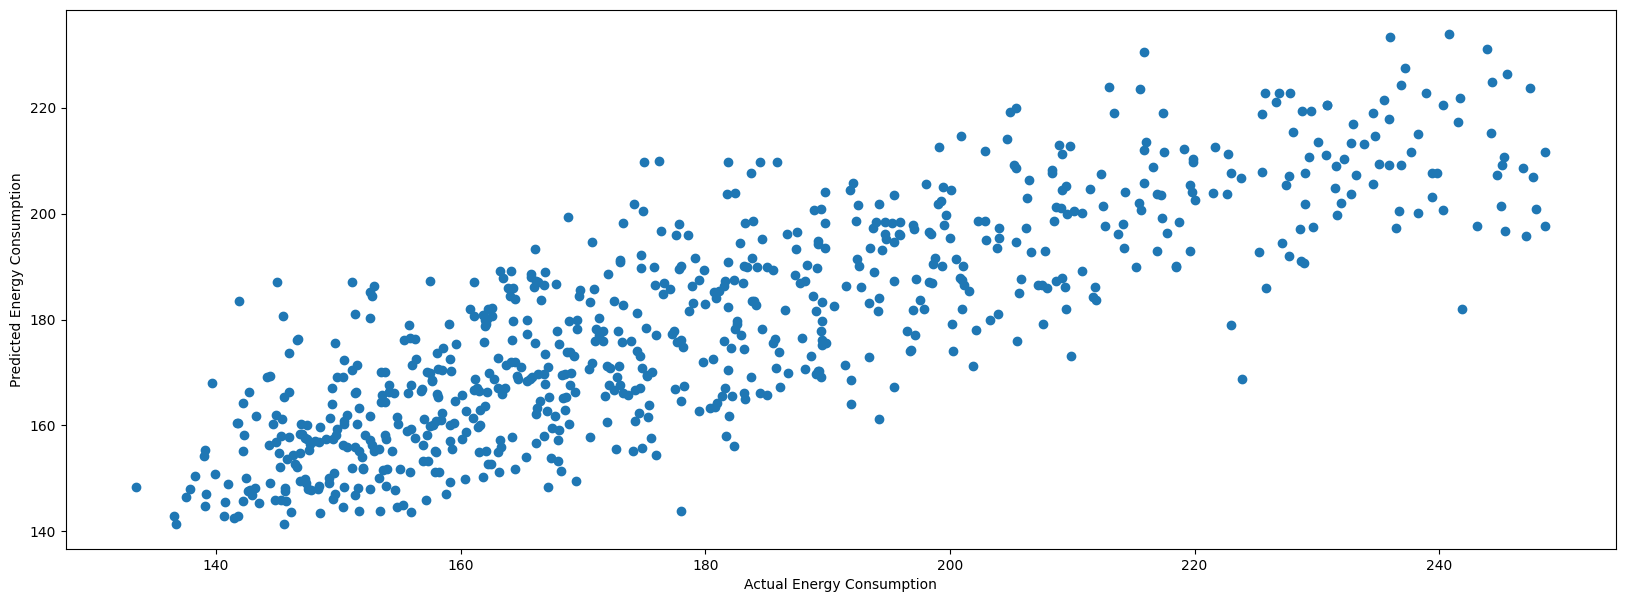

In [62]:
plt.scatter(predicted_vs_actual.Actual, predicted_vs_actual.Predicted)
plt.xlabel("Actual Energy Consumption")
plt.ylabel("Predicted Energy Consumption")

## **Summary:**
The scatter plot above shows a positive correlation of the data predicted by the KNN model against the actual data.  This correlation between the predicted and actual data indicates that the KNN model is effectively capturing the underlying patterns in the data

### **Plotting the predicted energy consumption data vs actual energy consumption in the test period.**

<Axes: xlabel='timestamp'>

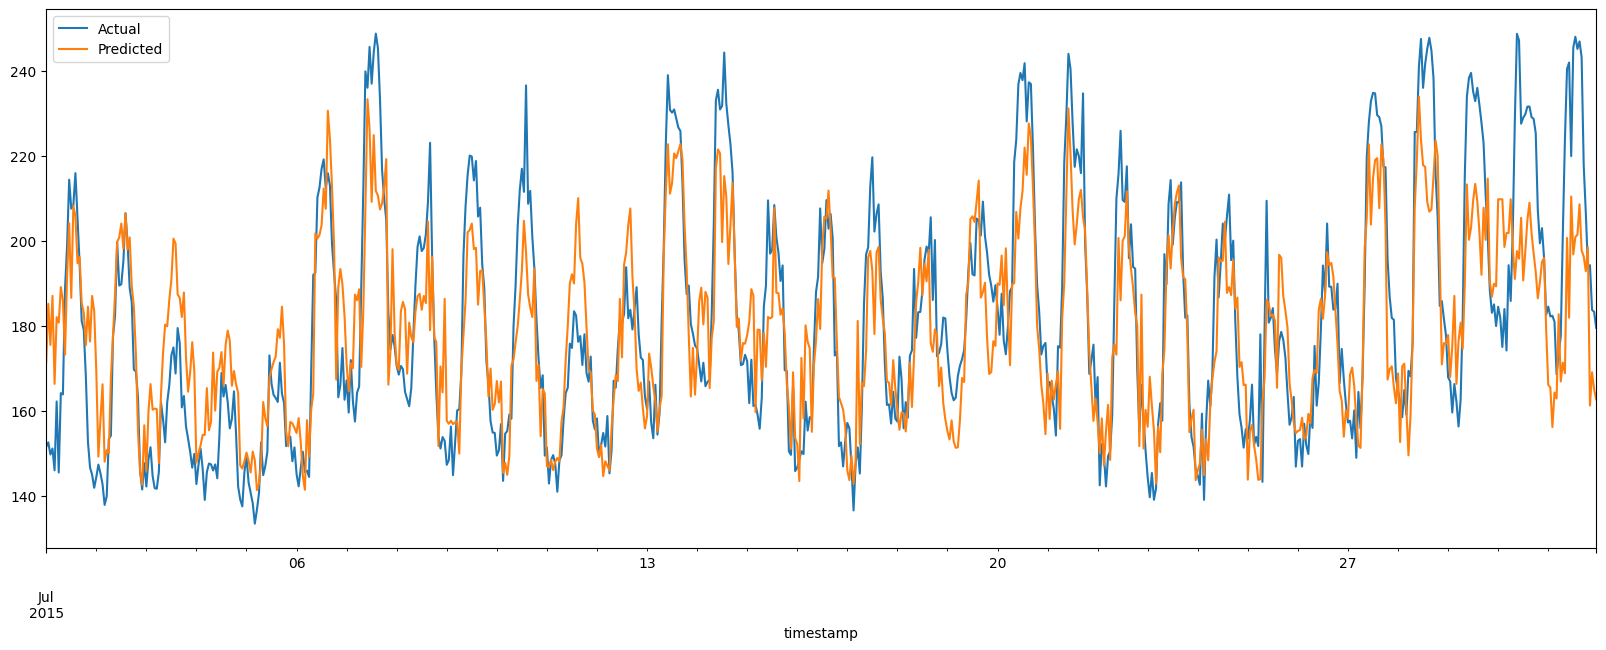

In [63]:
predicted_vs_actual.plot()

In [64]:
trainingdata.columns = ["Actual"]

### **Concatenating Training Data with the new dataframe above that has both actual data from the test period and its predicted data from the KNN model.**

In [65]:
predicted_vs_actual_plus_training = pd.concat([trainingdata, predicted_vs_actual], sort=True)

### **Plotting the resulting Dataframe**:

<Axes: xlabel='timestamp'>

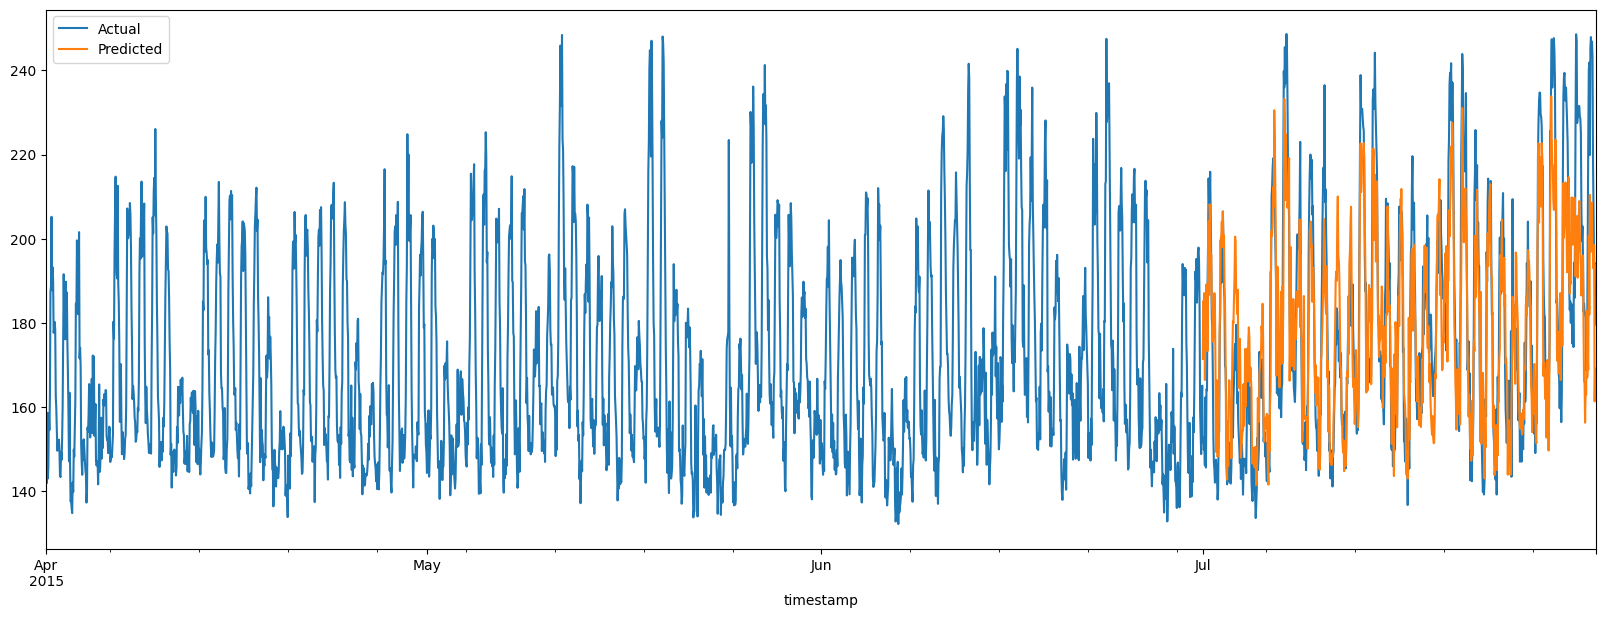

In [66]:
predicted_vs_actual_plus_training.plot()

In [67]:
from sklearn.metrics import mean_squared_error

In [68]:
test_predictions = model.predict(test_features)
mse_test = mean_squared_error(testdata.values, test_predictions) / 2
print(f"Mean Squared Error (MSE) on Test Data: {mse_test:.2f}")

Mean Squared Error (MSE) on Test Data: 146.18


## **Regression evaluation metrics**

To quantitively understand how the model performed compared to the reality (actual), we use the Mean Absolute Percentage Error (MAPE) metric.

In [69]:
# Calculate the absolute errors
errors = abs(predicted_vs_actual['Predicted'] - predicted_vs_actual['Actual'])
# Calculate mean absolute percentage error (MAPE) and add to list
MAPE = 100 * np.mean((errors / predicted_vs_actual['Actual']))

In [70]:
print(f'Mean Absolute Percentage error (MAPE) of the cross validation set: {MAPE:.2f} %')

Mean Absolute Percentage error (MAPE) of the cross validation set: 6.84 %


In [71]:
mse_cross_val = mean_squared_error(predicted_vs_actual['Actual'], predicted_vs_actual['Predicted']) / 2
print(f"mean squared error (MSE) on cross validation Data: {mse_cross_val:.2f}")

mean squared error (MSE) on cross validation Data: 129.64


# **SECTION C: Classification Models to Predict Comfort based on Temperature Conditions**

Predicting the comfort of buildings based on temperature, as below, involves analyzing temperature data to categorize whether indoor conditions are comfortable or not.
Below, we apply random forest machine learning model to classify temperature levels into distinct comfort zones. The model will learn from historical data, i.e the temperature readings and the associated comfort level ratings to make real-time predictions.
We aim to help building managers ensure that indoor environments are maintained within the optimal temperature ranges for occupants, improving overall comfort and energy efficiency. This approach will ultimately support proactive adjustments to HVAC systems, reducing energy waste while maintaining a comfortable environment.

In [72]:
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_curve, auc, precision_recall_curve
# from sklearn.externals import joblib
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import SelectKBest

## **Load the IEQ Data and find a classification objective**

In [73]:
directory3 = r'D:\AEC Project\EDX_DS+ML_BuildingGenome\4 - Operations'  
# Construct the full file path
thermal_comfort_data = 'ashrae_thermal_comfort_database_2.csv'
filepath3 = os.path.join(directory3, thermal_comfort_data)

# Check if the file exists in the directory
if os.path.exists(filepath3):
    # Read the CSV file into a DataFrame
    ieq_data = pd.read_csv(filepath3, index_col = 'Unnamed: 0')
    print(f'{ieq_data} loaded successfully')
    print(ieq_data.head())
else:
    print(f'{thermal_comfort_data} not found in the directory')

                                   Publication (Citation)    Year  Season  \
2233    Indraganti, Madhavi, et al. "Adaptive model of...  2012.0  Winter   
2234    Indraganti, Madhavi, et al. "Adaptive model of...  2012.0  Winter   
2235    Indraganti, Madhavi, et al. "Adaptive model of...  2012.0  Winter   
2236    Indraganti, Madhavi, et al. "Adaptive model of...  2012.0  Winter   
2237    Indraganti, Madhavi, et al. "Adaptive model of...  2012.0  Winter   
...                                                   ...     ...     ...   
104027  Cena, K. and de Dear, R. (1999) "Field Study o...  1997.0  Summer   
104030  Cena, K. and de Dear, R. (1999) "Field Study o...  1997.0  Summer   
104031  Cena, K. and de Dear, R. (1999) "Field Study o...  1997.0  Summer   
104032  Cena, K. and de Dear, R. (1999) "Field Study o...  1997.0  Summer   
104033  Cena, K. and de Dear, R. (1999) "Field Study o...  1997.0  Summer   

                     Climate        City    Country Building type  \
2233  

In [74]:
ieq_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43448 entries, 2233 to 104033
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Publication (Citation)           43448 non-null  object 
 1   Year                             43448 non-null  float64
 2   Season                           43448 non-null  object 
 3   Climate                          43448 non-null  object 
 4   City                             43448 non-null  object 
 5   Country                          43448 non-null  object 
 6   Building type                    43448 non-null  object 
 7   Cooling startegy_building level  43448 non-null  object 
 8   Sex                              43448 non-null  object 
 9   Thermal sensation                43448 non-null  float64
 10  Clo                              43448 non-null  float64
 11  Met                              43448 non-null  float64
 12  Air temperature (C)

In [75]:
ieq_data["ThermalSensation_rounded"].value_counts()

ThermalSensation_rounded
 0.0    19537
 1.0     8396
-1.0     7693
 2.0     3657
-2.0     2459
 3.0     1265
-3.0      441
Name: count, dtype: int64

## **Classification Objective -- Predict Thermal Sensation using a Random Forest Model**


## **Creating Feature and Target Data Sets**
Creating a feature data set and the target variable.

In [76]:
ieq_data.head()

,Publication (Citation),Year,Season,Climate,City,Country,Building type,Cooling startegy_building level,Sex,Thermal sensation,Clo,Met,Air temperature (C),Relative humidity (%),Air velocity (m/s),ThermalSensation_rounded
2233,"Indraganti, Madhavi, et al. ""Adaptive model of...",2012.0,Winter,Tropical wet savanna,Chennai,India,Office,Mixed Mode,Female,-2.0,0.75,1.0,25.2,64.0,0.1,-2.0
2234,"Indraganti, Madhavi, et al. ""Adaptive model of...",2012.0,Winter,Tropical wet savanna,Chennai,India,Office,Mixed Mode,Male,-1.0,0.64,1.0,25.2,64.0,0.1,-1.0
2235,"Indraganti, Madhavi, et al. ""Adaptive model of...",2012.0,Winter,Tropical wet savanna,Chennai,India,Office,Mixed Mode,Male,-2.0,0.64,1.0,25.2,64.0,0.1,-2.0
2236,"Indraganti, Madhavi, et al. ""Adaptive model of...",2012.0,Winter,Tropical wet savanna,Chennai,India,Office,Mixed Mode,Female,-2.0,0.75,1.0,25.2,64.0,0.1,-2.0
2237,"Indraganti, Madhavi, et al. ""Adaptive model of...",2012.0,Winter,Tropical wet savanna,Chennai,India,Office,Mixed Mode,Male,0.0,0.72,1.0,25.2,64.0,0.1,0.0


In [77]:
list(ieq_data.columns)

['Publication (Citation)',
 'Year',
 'Season',
 'Climate',
 'City',
 'Country',
 'Building type',
 'Cooling startegy_building level',
 'Sex',
 'Thermal sensation',
 'Clo',
 'Met',
 'Air temperature (C)',
 'Relative humidity (%)',
 'Air velocity (m/s)',
 'ThermalSensation_rounded']

The columns highighted above are used as input features for the classification model. These features will be used by the model to try to predict `ThermalSensation_rounded`.

Several of the features are related to the building context (i.e.: `Country`, `City`), the environmental conditions (i.e.: `Air Temperature (C)`, `Relative humidity (%)`) and personal factors (i.e.: `Sex`, `Clo`, etc.)


In [78]:
feature_columns = [
 'Year',
 'Season',
 'Climate',
 'City',
 'Country',
 'Building type',
 'Cooling startegy_building level',
 'Sex',
 'Clo',
 'Met',
 'Air temperature (C)',
 'Relative humidity (%)',
 'Air velocity (m/s)']

In [79]:
features = ieq_data[feature_columns]
features.info()
features.head()

<class 'pandas.core.frame.DataFrame'>
Index: 43448 entries, 2233 to 104033
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             43448 non-null  float64
 1   Season                           43448 non-null  object 
 2   Climate                          43448 non-null  object 
 3   City                             43448 non-null  object 
 4   Country                          43448 non-null  object 
 5   Building type                    43448 non-null  object 
 6   Cooling startegy_building level  43448 non-null  object 
 7   Sex                              43448 non-null  object 
 8   Clo                              43448 non-null  float64
 9   Met                              43448 non-null  float64
 10  Air temperature (C)              43448 non-null  float64
 11  Relative humidity (%)            43448 non-null  float64
 12  Air velocity (m/s) 

,Year,Season,Climate,City,Country,Building type,Cooling startegy_building level,Sex,Clo,Met,Air temperature (C),Relative humidity (%),Air velocity (m/s)
2233,2012.0,Winter,Tropical wet savanna,Chennai,India,Office,Mixed Mode,Female,0.75,1.0,25.2,64.0,0.1
2234,2012.0,Winter,Tropical wet savanna,Chennai,India,Office,Mixed Mode,Male,0.64,1.0,25.2,64.0,0.1
2235,2012.0,Winter,Tropical wet savanna,Chennai,India,Office,Mixed Mode,Male,0.64,1.0,25.2,64.0,0.1
2236,2012.0,Winter,Tropical wet savanna,Chennai,India,Office,Mixed Mode,Female,0.75,1.0,25.2,64.0,0.1
2237,2012.0,Winter,Tropical wet savanna,Chennai,India,Office,Mixed Mode,Male,0.72,1.0,25.2,64.0,0.1


The **target** variable in this project is thermal sensation. The "rounded" version to minimize the number of categories. It is has been normalized.

In [80]:
target = ieq_data['ThermalSensation_rounded']
target.head()

2233   -2.0
2234   -1.0
2235   -2.0
2236   -2.0
2237    0.0
Name: ThermalSensation_rounded, dtype: float64

## **Create dummy variables for the categories**
The categorical variables are encoded by converting them to dummy variables

In [81]:
features_withdummies = pd.get_dummies(features)
features_withdummies.head()


,Year,Clo,Met,Air temperature (C),Relative humidity (%),Air velocity (m/s),Season_Autumn,Season_Spring,Season_Summer,Season_Winter,...,Building type_Multifamily housing,Building type_Office,Building type_Others,Building type_Senior center,Cooling startegy_building level_Air Conditioned,Cooling startegy_building level_Mechanically Ventilated,Cooling startegy_building level_Mixed Mode,Cooling startegy_building level_Naturally Ventilated,Sex_Female,Sex_Male
2233,2012.0,0.75,1.0,25.2,64.0,0.1,False,False,False,True,...,False,True,False,False,False,False,True,False,True,False
2234,2012.0,0.64,1.0,25.2,64.0,0.1,False,False,False,True,...,False,True,False,False,False,False,True,False,False,True
2235,2012.0,0.64,1.0,25.2,64.0,0.1,False,False,False,True,...,False,True,False,False,False,False,True,False,False,True
2236,2012.0,0.75,1.0,25.2,64.0,0.1,False,False,False,True,...,False,True,False,False,False,False,True,False,True,False
2237,2012.0,0.72,1.0,25.2,64.0,0.1,False,False,False,True,...,False,True,False,False,False,False,True,False,False,True


## **Creating the Train, Cross validation and Test Split using SK-Learn**
Dividing the data set into a random train, cross validation and test sets combinations:

In [82]:
# Getting 60% of the dataset as the training set. The remaining 40% are in temprary variables: x_ and y_.
features_train,  x_, target_train, y_ = train_test_split(features_withdummies, target, test_size=0.3, random_state=1)
# Splitting the 40% subset into two: half of it for cross validation and the other half for the test set.
features_cv, features_test, target_cv, target_test = train_test_split(x_, y_, test_size=0.5, random_state=1)
# Deleting the temporary vaariables
del x_, y_

print(f"the shape of the training set (input) is: {features_train.shape}")
print(f"the shape of the training set (target) is: {target_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {features_cv.shape}")
print(f"the shape of the cross validation set (target) is: {target_cv.shape}\n")
print(f"the shape of the test set (input) is: {features_test.shape}")
print(f"the shape of the test set (target) is: {target_test.shape}")

the shape of the training set (input) is: (30413, 102)
the shape of the training set (target) is: (30413,)

the shape of the cross validation set (input) is: (6517, 102)
the shape of the cross validation set (target) is: (6517,)

the shape of the test set (input) is: (6518, 102)
the shape of the test set (target) is: (6518,)


In [83]:
features_train.info()
features_train.head()

<class 'pandas.core.frame.DataFrame'>
Index: 30413 entries, 70614 to 84738
Columns: 102 entries, Year to Sex_Male
dtypes: bool(96), float64(6)
memory usage: 4.4 MB


,Year,Clo,Met,Air temperature (C),Relative humidity (%),Air velocity (m/s),Season_Autumn,Season_Spring,Season_Summer,Season_Winter,...,Building type_Multifamily housing,Building type_Office,Building type_Others,Building type_Senior center,Cooling startegy_building level_Air Conditioned,Cooling startegy_building level_Mechanically Ventilated,Cooling startegy_building level_Mixed Mode,Cooling startegy_building level_Naturally Ventilated,Sex_Female,Sex_Male
70614,2012.0,0.70,1.40,23.4,49.5,0.10,False,False,True,False,...,False,True,False,False,True,False,False,False,False,True
82798,1988.0,0.56,1.10,22.8,65.6,0.11,False,False,True,False,...,False,True,False,False,True,False,False,False,False,True
69135,2012.0,0.70,1.10,27.5,44.6,0.15,False,False,False,True,...,False,True,False,False,False,False,False,True,False,True
70826,2012.0,0.59,1.10,34.8,44.2,1.10,False,False,True,False,...,False,True,False,False,False,False,True,False,False,True
100748,1993.0,0.71,1.64,22.9,63.0,0.12,False,False,True,False,...,False,True,False,False,True,False,False,False,True,False


In [84]:
features_test.info()
features_test.head()

<class 'pandas.core.frame.DataFrame'>
Index: 6518 entries, 72457 to 68608
Columns: 102 entries, Year to Sex_Male
dtypes: bool(96), float64(6)
memory usage: 967.5 KB


,Year,Clo,Met,Air temperature (C),Relative humidity (%),Air velocity (m/s),Season_Autumn,Season_Spring,Season_Summer,Season_Winter,...,Building type_Multifamily housing,Building type_Office,Building type_Others,Building type_Senior center,Cooling startegy_building level_Air Conditioned,Cooling startegy_building level_Mechanically Ventilated,Cooling startegy_building level_Mixed Mode,Cooling startegy_building level_Naturally Ventilated,Sex_Female,Sex_Male
72457,2012.0,0.91,1.10,22.1,80.4,0.00,False,False,True,False,...,False,True,False,False,False,False,False,True,True,False
6590,2012.0,0.63,1.00,26.5,62.0,0.02,False,False,True,False,...,False,True,False,False,False,False,True,False,True,False
59505,2010.0,0.60,1.00,23.3,67.9,0.10,False,True,False,False,...,False,True,False,False,True,False,False,False,True,False
54244,1999.0,0.80,1.20,25.5,52.4,0.04,True,False,False,False,...,False,False,True,False,False,False,True,False,True,False
86750,1982.0,0.47,1.06,22.3,51.2,0.27,False,False,True,False,...,False,True,False,False,True,False,False,False,False,True


In [85]:
target_train.info()
target_train.head()

<class 'pandas.core.series.Series'>
Index: 30413 entries, 70614 to 84738
Series name: ThermalSensation_rounded
Non-Null Count  Dtype  
--------------  -----  
30413 non-null  float64
dtypes: float64(1)
memory usage: 475.2 KB


70614     0.0
82798    -1.0
69135     1.0
70826     2.0
100748    1.0
Name: ThermalSensation_rounded, dtype: float64

In [86]:
target_test.info()
target_test.head()

<class 'pandas.core.series.Series'>
Index: 6518 entries, 72457 to 68608
Series name: ThermalSensation_rounded
Non-Null Count  Dtype  
--------------  -----  
6518 non-null   float64
dtypes: float64(1)
memory usage: 101.8 KB


72457    0.0
6590     1.0
59505    0.0
54244    0.0
86750   -1.0
Name: ThermalSensation_rounded, dtype: float64

## **Hyperparameter Tuning for the Random Forest Model**

In [87]:
from sklearn.metrics import accuracy_score

In [88]:
RANDOM_STATE = 55
min_samples_split_list = [100,200, 300, 400, 500, 600, 700, 800, 900]  ## If the number is an integer, then it is the actual quantity of samples,
                                             ## If it is a float, then it is the percentage of the dataset
max_depth_list = [2, 4, 8, 16, 32, 64, None]
n_estimators_list = [10,50,100,500]

#### **1. Determining the Number of Splits to Use**

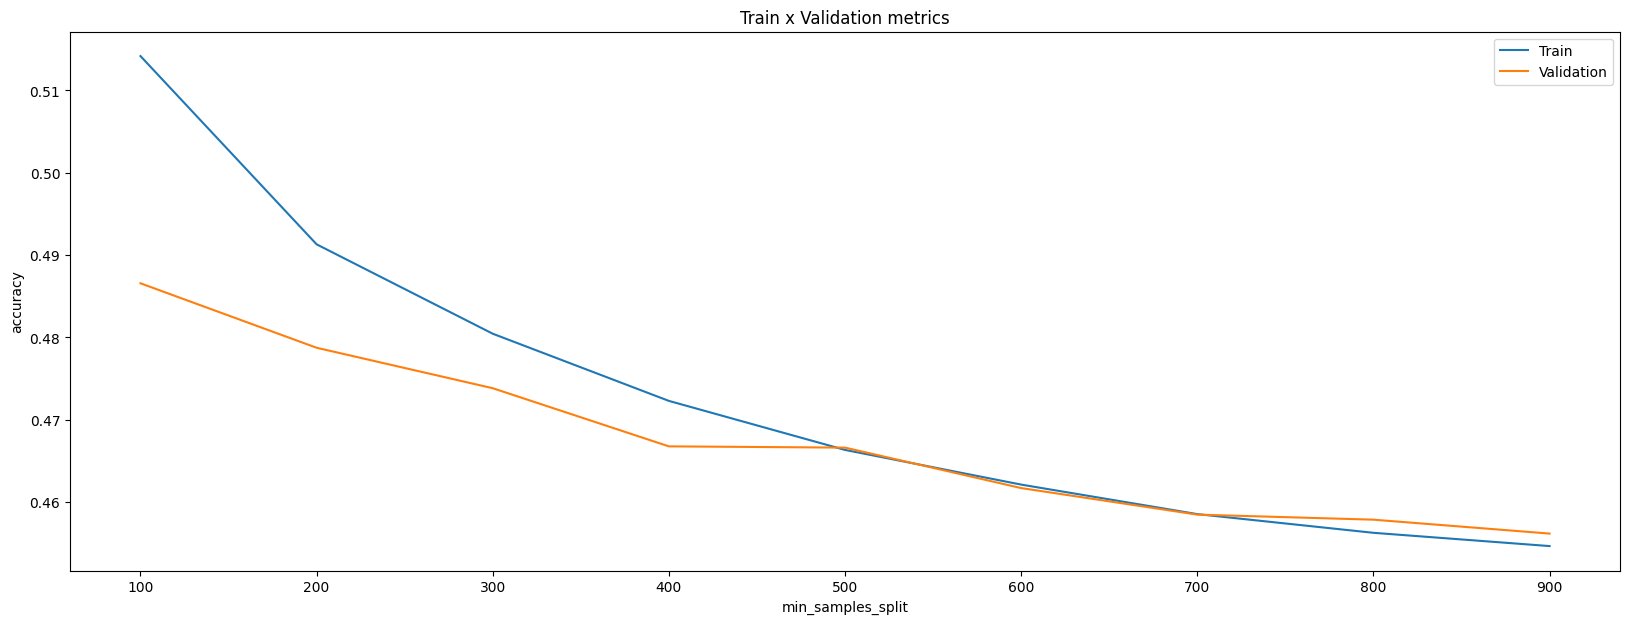

In [89]:
accuracy_list_train = []
accuracy_list_val = []
for min_samples_split in min_samples_split_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(min_samples_split = min_samples_split,
                                   random_state = RANDOM_STATE).fit(features_train,target_train)
    predictions_train = model.predict(features_train) ## The predicted values for the train dataset
    predictions_val = model.predict(features_cv) ## The predicted values for the cross validation dataset
    accuracy_train = accuracy_score(predictions_train,target_train)
    accuracy_val = accuracy_score(predictions_val,target_cv)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

### **2. Determining the Max depth of the Decision Trees in the Random Forest Model**

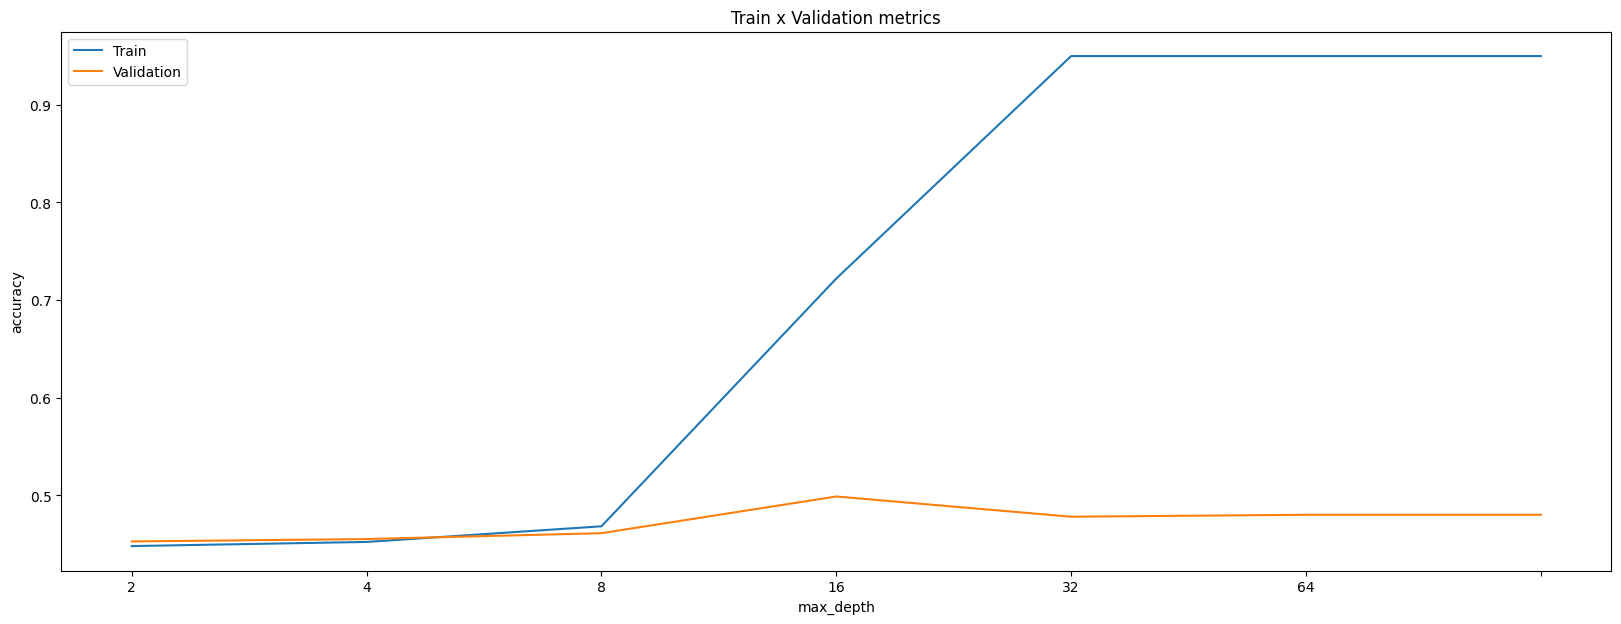

In [90]:
accuracy_list_train = []
accuracy_list_val = []
for max_depth in max_depth_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(max_depth = max_depth,
                                   random_state = RANDOM_STATE).fit(features_train,target_train)
    predictions_train = model.predict(features_train) ## The predicted values for the train dataset
    predictions_val = model.predict(features_cv) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,target_train)
    accuracy_val = accuracy_score(predictions_val,target_cv)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

### **3. Determining the number of n_estimators for the Model**

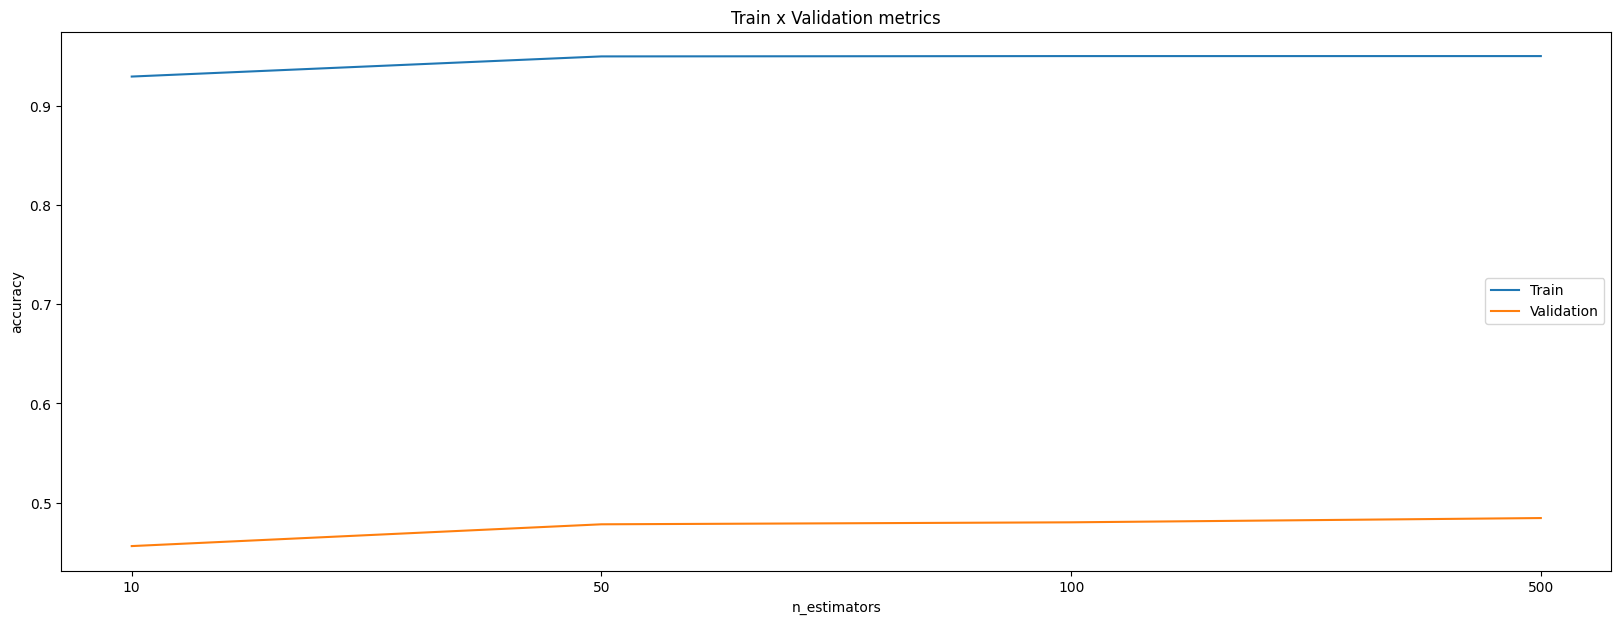

In [91]:
accuracy_list_train = []
accuracy_list_val = []
for n_estimators in n_estimators_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(n_estimators = n_estimators,
                                   random_state = RANDOM_STATE).fit(features_train,target_train)
    predictions_train = model.predict(features_train) ## The predicted values for the train dataset
    predictions_val = model.predict(features_cv) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,target_train)
    accuracy_val = accuracy_score(predictions_val,target_cv)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

## **Findings on the optimum parameter values for the Random Forest Model**
Based on the plots above, we determine the following values as the parameters of the Random Forest Model:


1.   max_depth: 6
2.   min_samples_split: 480
3.   n_estimators: 100



## **Training the Random Forest Model and Accuracy score Metric of the Random Forest Model**

Here, we are calling the Random Forest model from sklearn that was loaded before and specifying various input features (or parameters) that influence the way the model is constructed.

These parameters are optimized in order to achieve the best accuracy.

In [92]:
#model_rf = RandomForestClassifier(oob_score = True, max_features = 'sqrt', n_estimators = 100, min_samples_leaf = 2, random_state = 2)

In [93]:
model_rf = RandomForestClassifier(oob_score = True, max_features = 'sqrt', n_estimators = 100, min_samples_leaf = 2, random_state = 55, max_depth = 4, min_samples_split= 250).fit(features_train,target_train)

In [94]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(model_rf.predict(features_train),target_train):.4f}\nMetrics cross validation set:\n\tAccuracy score: {accuracy_score(model_rf.predict(features_cv),target_cv):.4f}")

Metrics train:
	Accuracy score: 0.4520
Metrics cross validation set:
	Accuracy score: 0.4550


In [95]:
random_forest_model = RandomForestClassifier(n_estimators = 100,
                                             max_depth = 6,
                                             min_samples_split = 480).fit(features_train,target_train)

In [96]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(features_train),target_train):.4f}\nMetrics cross validation set:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(features_cv),target_cv):.4f}")

Metrics train:
	Accuracy score: 0.4522
Metrics cross validation set:
	Accuracy score: 0.4547


In [97]:
model_rf.fit(features_train, target_train)


RandomForestClassifier(max_depth=4, min_samples_leaf=2, min_samples_split=250,
                       oob_score=True, random_state=55)

## **Testing the model using the Unseen Data: features_test and target_test:**

In [98]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(model_rf.predict(features_train),target_train):.4f}\nMetrics Test set:\n\tAccuracy score: {accuracy_score(model_rf.predict(features_test),target_test):.4f}")

Metrics train:
	Accuracy score: 0.4520
Metrics Test set:
	Accuracy score: 0.4573


In [99]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(features_train),target_train):.4f}\nMetrics Test set:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(features_test),target_test):.4f}")

Metrics train:
	Accuracy score: 0.4522
Metrics Test set:
	Accuracy score: 0.4598


Albeit with small difference between training accuracy and test data accuracy, and with the tuned parameters; the model provides better accuracy with unseen data

In [100]:
mean_model_accuracy = model_rf.oob_score_

print("Model accuracy: "+str(mean_model_accuracy))

Model accuracy: 0.4502022161575642


The model is accurate about half the time in predicting if someone is comfortable. That seems low, but we can find where the baseline is.

## **Creating a Baseline Model to compare the accuracy of the model**

Sci-kit learn allows you to create a baseline which is the accuracy in just random guessing



In [101]:
#Dummy Classifier model to get a baseline
baseline_rf = DummyClassifier(strategy='stratified',random_state=0)
baseline_rf.fit(features_train, target_train)
#DummyClassifier(constant=None, random_state=1, strategy='most_frequent')
baseline_model_accuracy = baseline_rf.score(features_test, target_test)
print("Model accuracy: "+str(baseline_model_accuracy))

Model accuracy: 0.2896594047253759


The baseline model is only 28%, therefore the model is almost twice the accuracy at predicting the right value

## **Classification Report**

Classification is often evaluated by more than just accuracy. Other metrics that we can calculate to understand the success to classification.include: `precision`, `recall`, `f1-score`, and `support` metrics for each of the classes being predicted.

In [102]:
y_pred = model_rf.predict(features_test)
y_true = np.array(target_test)
categories = np.array(target.sort_values().unique())
print(classification_report(y_true, y_pred, zero_division=0))

              precision    recall  f1-score   support

        -3.0       0.00      0.00      0.00        67
        -2.0       0.00      0.00      0.00       353
        -1.0       0.00      0.00      0.00      1138
         0.0       0.46      0.99      0.63      2959
         1.0       0.52      0.03      0.06      1246
         2.0       0.00      0.00      0.00       558
         3.0       0.00      0.00      0.00       197

    accuracy                           0.46      6518
   macro avg       0.14      0.15      0.10      6518
weighted avg       0.31      0.46      0.30      6518



## **Feature Importance**

With Random Forest models, there is the built-in capability to calculate the **Feature Importance**. As in our case below, the feature importance value is calculated based on which features most contribute to accurate predictions. See below:



In [103]:
importances = model_rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in model_rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

In [104]:
# Print the feature ranking
print("Feature ranking:")

for f in range(features_withdummies.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, features_withdummies.columns[indices[f]], importances[indices[f]]))

Feature ranking:
1. feature Air temperature (C) (0.230882)
2. feature Year (0.052804)
3. feature City_Shimla (0.051368)
4. feature Climate_Tropical wet savanna (0.050688)
5. feature Clo (0.048883)
6. feature City_Chennai (0.043748)
7. feature Climate_Subtropical highland (0.038232)
8. feature Climate_Hot-summer mediterranean (0.038228)
9. feature Relative humidity (%) (0.030781)
10. feature Season_Winter (0.028228)
11. feature Met (0.027407)
12. feature Country_India (0.025276)
13. feature Air velocity (m/s) (0.025222)
14. feature Climate_Hot semi-arid (0.024937)
15. feature Cooling startegy_building level_Naturally Ventilated (0.024314)
16. feature Season_Summer (0.023334)
17. feature Country_Brazil (0.015612)
18. feature City_Athens (0.015588)
19. feature Country_Greece (0.015515)
20. feature Cooling startegy_building level_Air Conditioned (0.012477)
21. feature City_Delhi (0.012471)
22. feature City_Jaipur (0.011959)
23. feature City_Hyderabad (0.011544)
24. feature City_London (0.0

According to the feature importance analysis, it seems that the conventional environmental metrics are the best predictors of comfort followed by the personal factors

## **Plotting Feature Importance**

We also plot the feature importance in a line chart of the top features to get a better visual sense

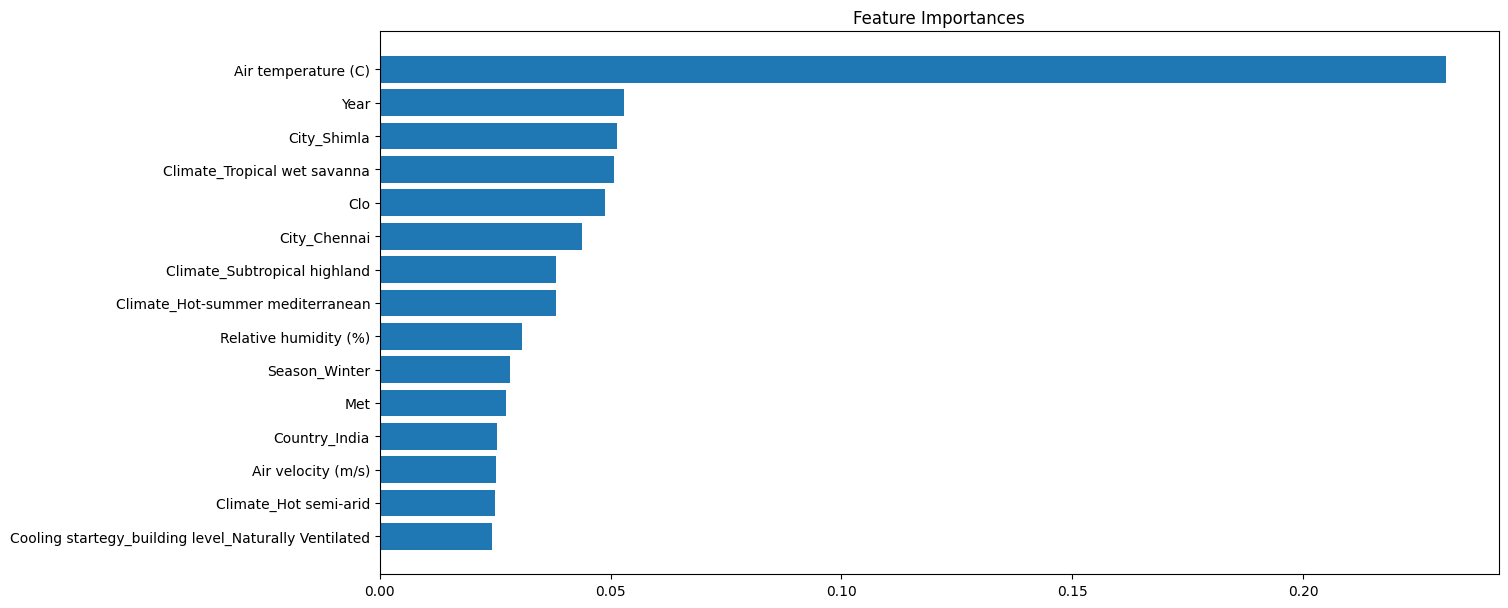

In [105]:
# Plot the feature importances of the forest
plt.figure(figsize=(15,6))
plt.title("Feature Importances")
plt.barh(range(15), importances[indices][:15], align="center")
plt.yticks(range(15), features_withdummies.columns[indices][:15])#
plt.gca().invert_yaxis()
plt.tight_layout(pad=0.4)
plt.show()


## **Classification Confusion Matrix Visualization**

A confusion matrix is a visualization that will help us understand which classes are being misclassified

In this case we will look at absolute numbers of misclassifications and a normalized version of misclassification.

In [106]:
def plot_confusion_matrix(cm, categories, title='Confusion matrix', cmap='Reds'):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(categories))
    plt.xticks(tick_marks,categories, rotation=90)
    plt.yticks(tick_marks,categories)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[   0    0    0   67    0    0    0]
 [   0    0    0  351    2    0    0]
 [   0    0    0 1136    2    0    0]
 [   0    0    0 2943   16    0    0]
 [   0    0    0 1208   38    0    0]
 [   0    0    0  543   15    0    0]
 [   0    0    0  197    0    0    0]]


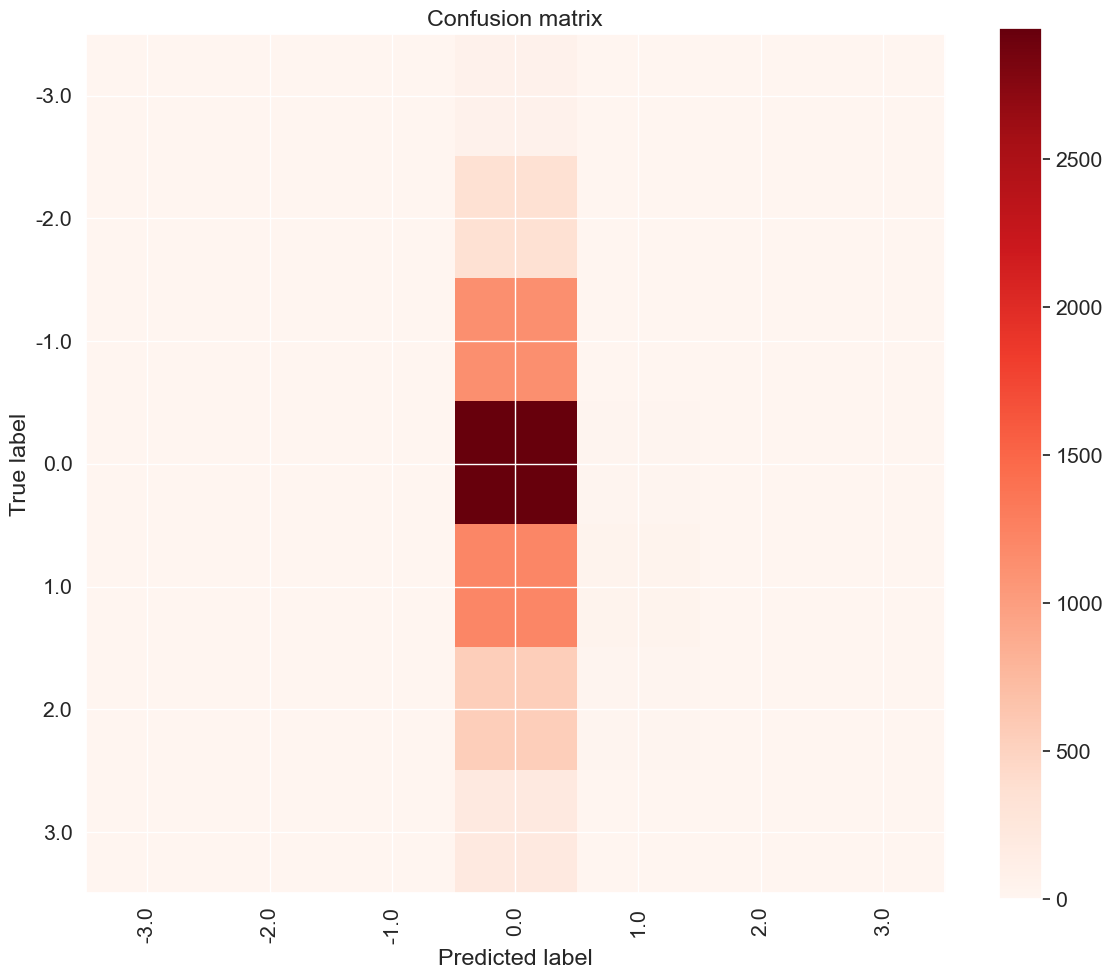

In [107]:
# plotting the confusion matrix:
sns.set(font_scale=1.4)
cm = confusion_matrix(y_true, y_pred)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(figsize=(12,10))
plot_confusion_matrix(cm, categories)

Normalized confusion matrix
[[0.   0.   0.   1.   0.   0.   0.  ]
 [0.   0.   0.   0.99 0.01 0.   0.  ]
 [0.   0.   0.   1.   0.   0.   0.  ]
 [0.   0.   0.   0.99 0.01 0.   0.  ]
 [0.   0.   0.   0.97 0.03 0.   0.  ]
 [0.   0.   0.   0.97 0.03 0.   0.  ]
 [0.   0.   0.   1.   0.   0.   0.  ]]


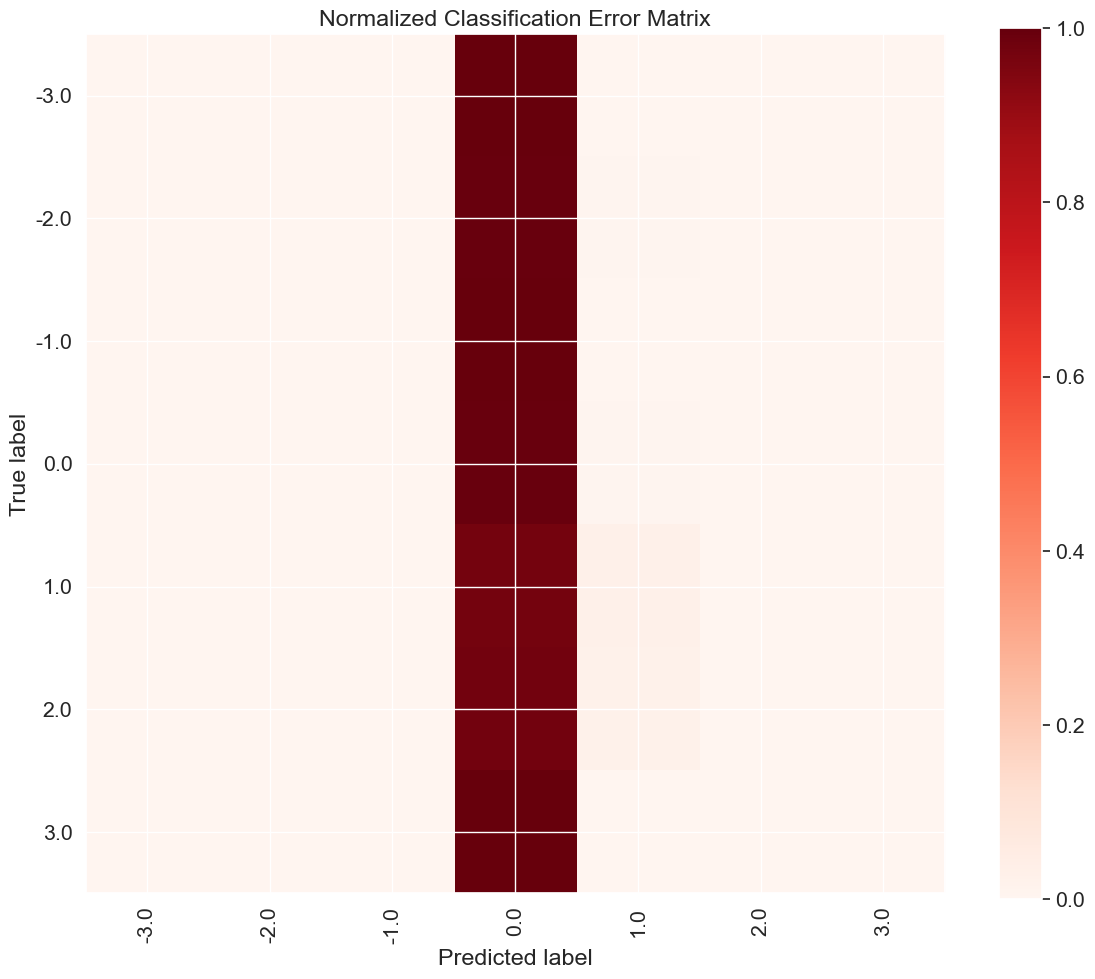

In [108]:
# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure(figsize=(12,10))
plot_confusion_matrix(cm_normalized, categories, title='Normalized Classification Error Matrix')
plt.show()